In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr, chi2
from sklearn.covariance import MinCovDet

# Problem Statement
Coorporate wants to create an automation to predict which customer who is eligible to have a loan for the property. Given the dataset with several features, please do analysis for questions or hypothesis below.

In [2]:
train_data = pd.read_csv("loan_sanction_train.csv")
test_data = pd.read_csv("loan_sanction_test.csv")

In [3]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


In [4]:
# Look the data briefly
display(train_data.head())
print("Data Info :")
print(train_data.info())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


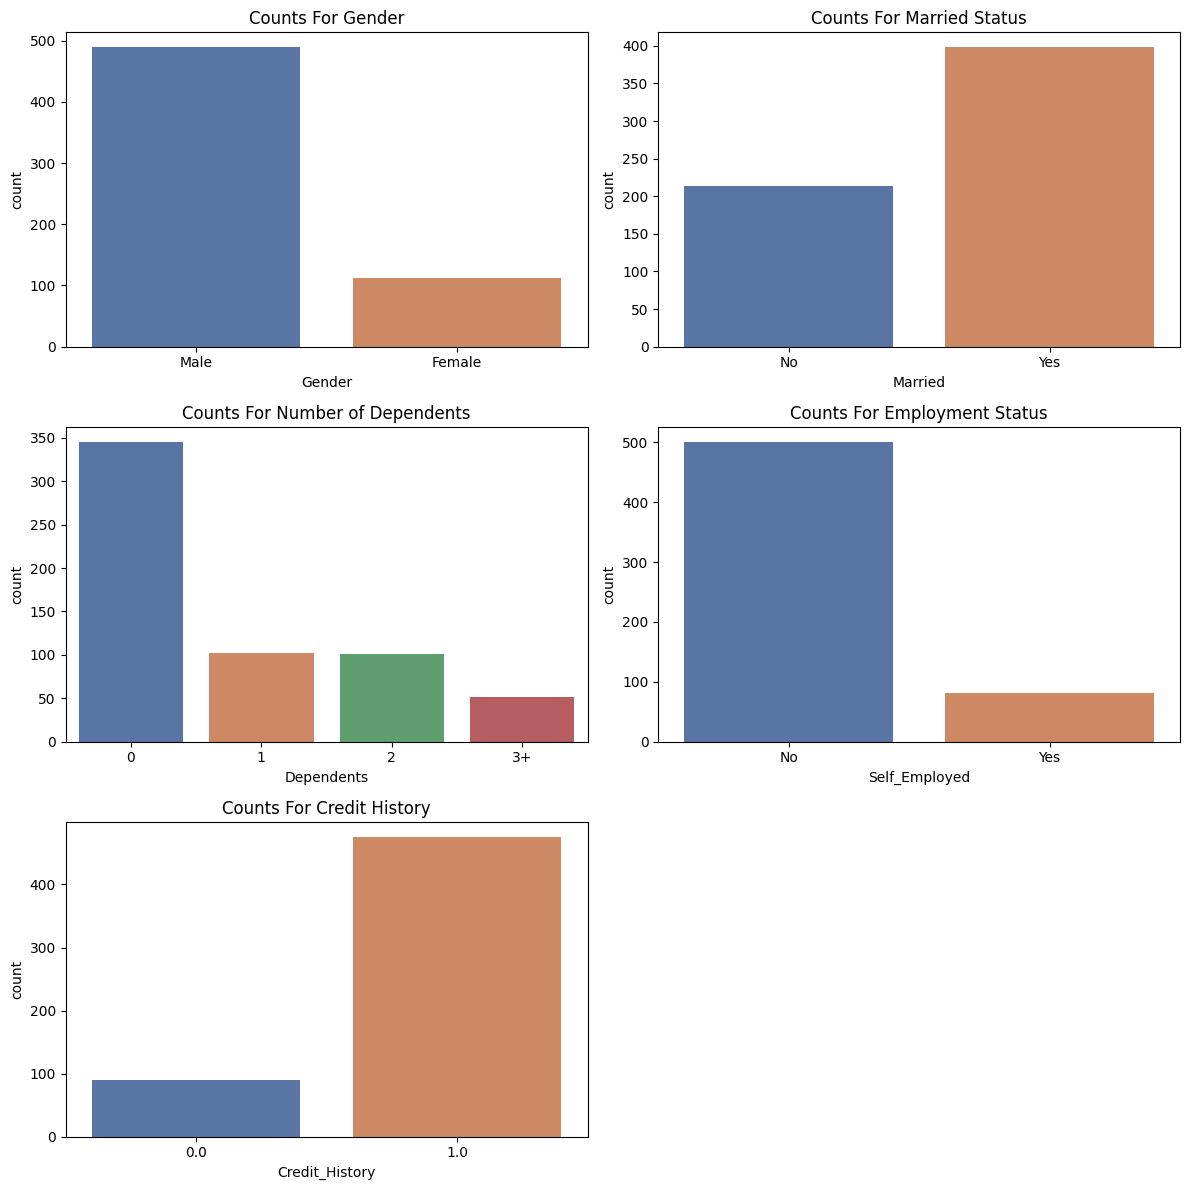

In [5]:
# lets plot the counts of 4 feautures (Gender, Married, Number of Dependents, and Employment Status)
# We'll be choosing the mode of every features to be selected as value for missing values

sns.set_palette('deep')
fig, ax = plt.subplots(3,2,figsize = (12,12))
sns.countplot(x = 'Gender', data = train_data, ax = ax[0,0])
sns.countplot(x = 'Married', data = train_data, ax = ax[0,1])
sns.countplot(x = 'Dependents', data = train_data, ax = ax[1,0])
sns.countplot(x = 'Self_Employed', data = train_data, ax = ax[1,1])
sns.countplot(x = 'Credit_History', data = train_data, ax = ax[2,0])
ax[2,1].axis('off')

ax[0,0].set_title('Counts For Gender')
ax[0,1].set_title('Counts For Married Status')
ax[1,0].set_title('Counts For Number of Dependents')
ax[1,1].set_title('Counts For Employment Status')
ax[2,0].set_title('Counts For Credit History')

plt.tight_layout()
plt.show()

In [6]:
# We're assuming mode of every categorical features and median of every numeric features to be the value for missing values.
train_copy = train_data.copy()
train_copy['Gender'] = train_copy['Gender'].fillna('Male')
train_copy['Married'] = train_copy['Married'].fillna('Yes')
train_copy['Dependents'] = train_copy['Dependents'].fillna('0')
train_copy['Self_Employed'] = train_copy['Self_Employed'].fillna('No')
train_copy['Credit_History'] = train_copy['Credit_History'].fillna(1.0).astype(int)
train_copy['LoanAmount'] = train_copy['LoanAmount'].fillna(np.median(train_copy['LoanAmount'].dropna()))
train_copy['Loan_Amount_Term'] = train_copy['Loan_Amount_Term'].fillna(np.median(train_copy['Loan_Amount_Term'].dropna()))


In [7]:
print(train_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int32  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 60.1+ KB
None


In [8]:
# Checking Duplicated Values.
print("Number of duplicated data :")
print(train_copy.duplicated().sum())

Number of duplicated data :
0


# Exploratory Data Analysis

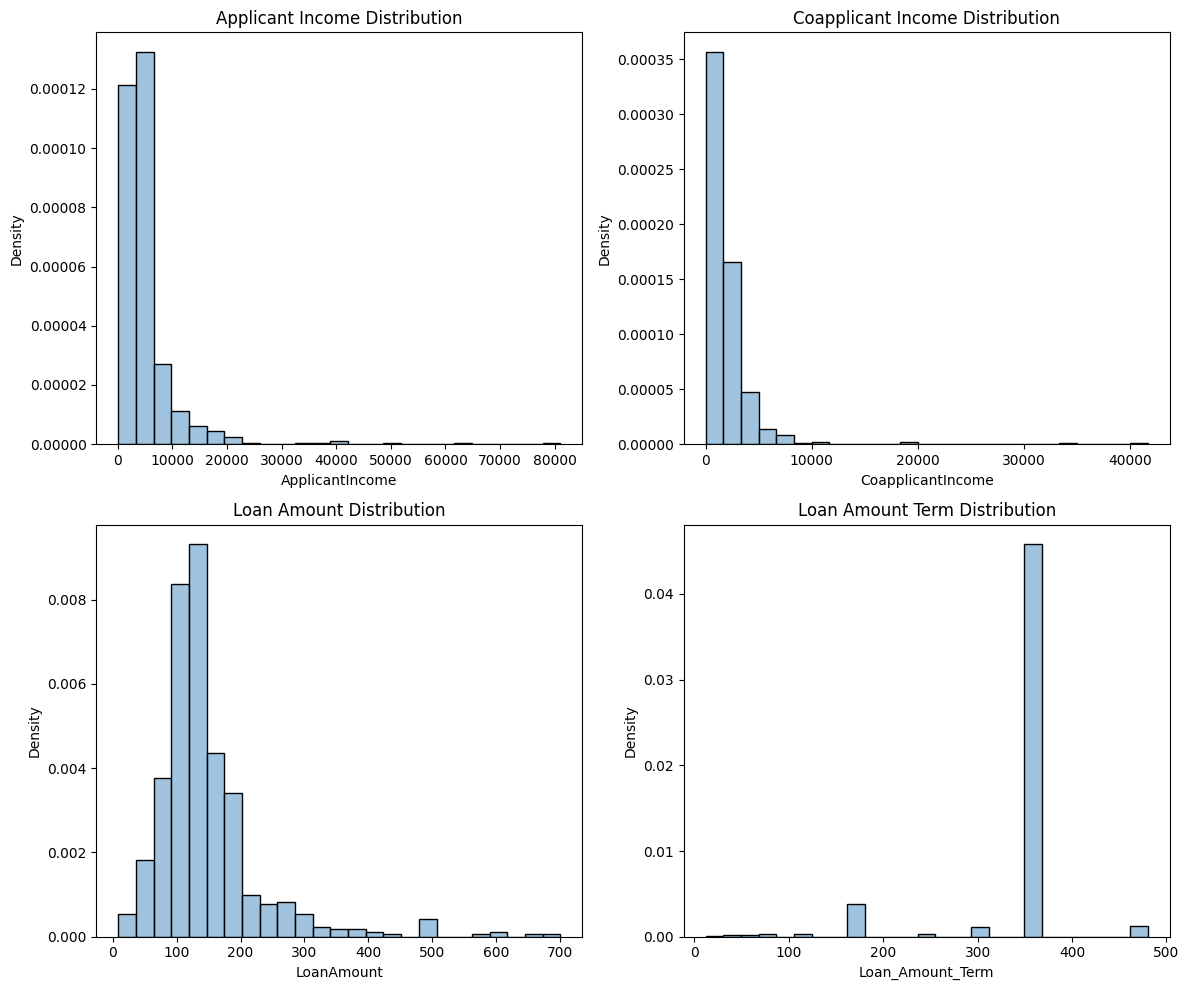

In [9]:
# try to plot continuous features on the data.
# Objective : to see distribution of continous features and detect outliers.

fig, ax = plt.subplots(2,2, figsize = (12,10))

sns.histplot(x = 'ApplicantIncome', data = train_copy, stat = 'density', color = '#80b0d5', ax = ax[0,0], bins = 25)
sns.histplot(x = 'CoapplicantIncome', data = train_copy, stat = 'density', color = '#80b0d5', ax = ax[0,1], bins = 25)
sns.histplot(x = 'LoanAmount', data = train_copy, stat = 'density', color = '#80b0d5', ax = ax[1,0], bins = 25)
sns.histplot(x = 'Loan_Amount_Term', data = train_copy, stat = 'density', color = '#80b0d5', ax = ax[1,1], bins = 25)

ax[0,0].set_title('Applicant Income Distribution')
ax[0,1].set_title('Coapplicant Income Distribution')
ax[1,0].set_title('Loan Amount Distribution')
ax[1,1].set_title('Loan Amount Term Distribution')

plt.tight_layout()
plt.show()

**Note:**
Based on above visualizations, we can see there are some outliers in our data. To address this problem, we will exclude the outliers for now and try to analyze furthermore after several steps. We will use multivariate method to detect the outliers with Mahalanobis Distance.

In [10]:
def remove_outlier_multivariate(data):
    """Fungsi ini akan mengeluarkan data yang telah dikeluarkan outliernya dan data outliernya"""
    selected_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
    x_values =  data.loc[:,selected_features].values
    mcd = MinCovDet()
    mcd.fit(x_values)
    loc_ = mcd.location_
    cov_ = mcd.covariance_
    mahal_robust_dist = mcd.mahalanobis(x_values)
    cutoff = chi2.ppf(0.95, x_values.shape[1])
    data_new = data.loc[mahal_robust_dist <= cutoff]
    data_outliers = data.loc[mahal_robust_dist > cutoff]
    return data_new, data_outliers

In [11]:
data_without, outliers = remove_outlier_multivariate(train_copy)

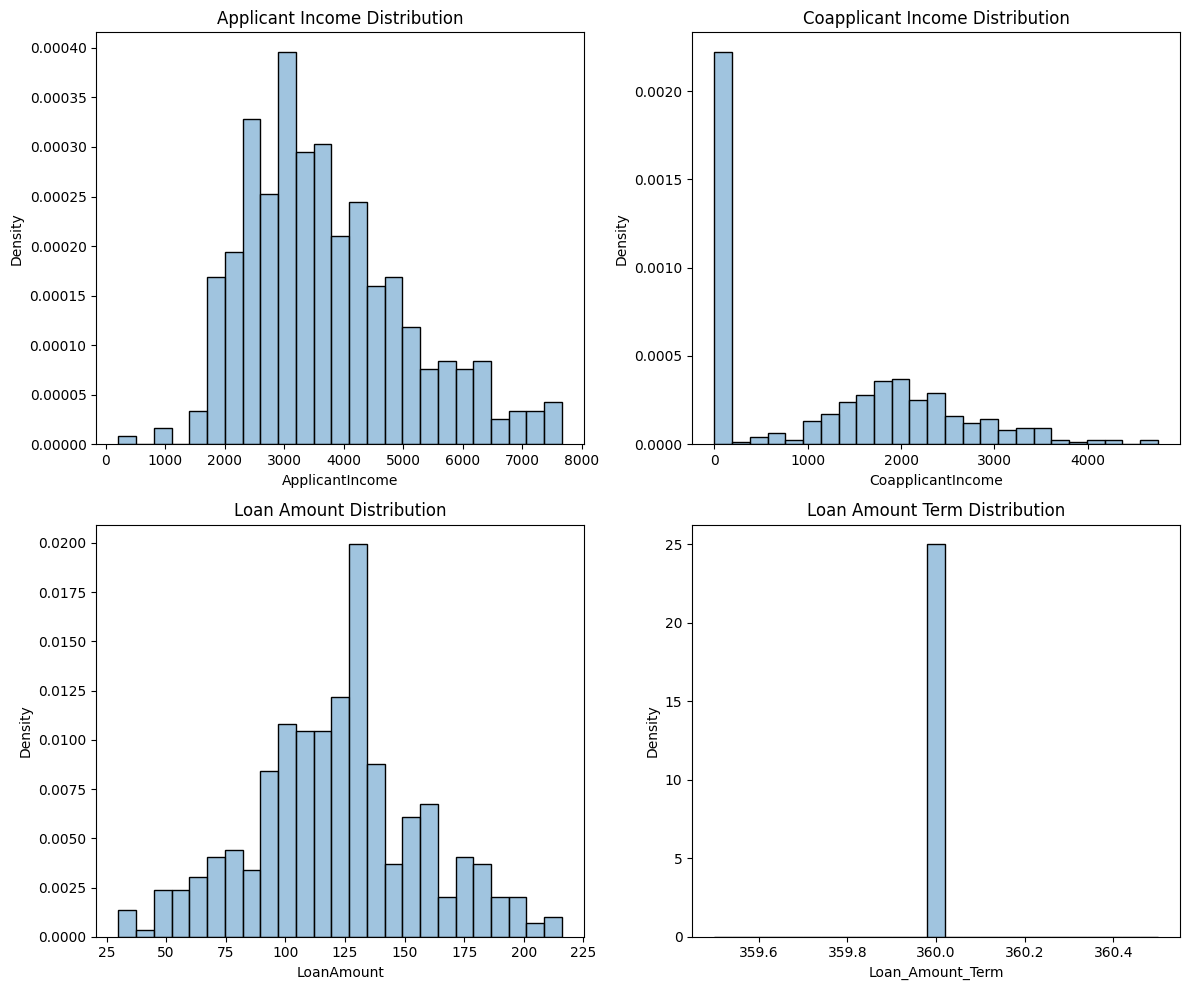

In [12]:
# try to plot continuous features on the data.
# Objective : to see distribution of continous features and detect outliers.

fig, ax = plt.subplots(2,2, figsize = (12,10))

sns.histplot(x = 'ApplicantIncome', data = data_without, stat = 'density', color = '#80b0d5', ax = ax[0,0], bins = 25)
sns.histplot(x = 'CoapplicantIncome', data = data_without, stat = 'density', color = '#80b0d5', ax = ax[0,1], bins = 25)
sns.histplot(x = 'LoanAmount', data = data_without, stat = 'density', color = '#80b0d5', ax = ax[1,0], bins = 25)
sns.histplot(x = 'Loan_Amount_Term', data = data_without, stat = 'density', color = '#80b0d5', ax = ax[1,1], bins = 25)

ax[0,0].set_title('Applicant Income Distribution')
ax[0,1].set_title('Coapplicant Income Distribution')
ax[1,0].set_title('Loan Amount Distribution')
ax[1,1].set_title('Loan Amount Term Distribution')

plt.tight_layout()
plt.show()

**Note:**
Based on above visualizations, we can see the distributions look more normal than the previous. However, we still have to analyze the outliers that we have removed previously. For now, we will find out how many outliers that have removed and proceed to do exploratory analysis.

In [13]:
print('Number of outliers :')
print(outliers.shape[0])
print('Number of data without outliers :')
print(data_without.shape[0])

Number of outliers :
216
Number of data without outliers :
398


In [14]:
# Lets Visualize the numeric features with descriptive stats,correlation tabel,scatterplot to find any patterns.
print("Descriptive Stats for the numeric features :")
display(data_without.loc[:,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].describe().T)

Descriptive Stats for the numeric features :


,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,398.0,3711.891960,1357.603363,210.0,2683.75,3464.5,4578.75,7667.0
CoapplicantIncome,398.0,1215.226432,1203.008674,0.0,0.00,1293.5,2130.00,4750.0
LoanAmount,398.0,121.474874,35.302480,30.0,100.00,121.0,139.75,216.0
Loan_Amount_Term,398.0,360.000000,0.000000,360.0,360.00,360.0,360.00,360.0


Correlation Table :


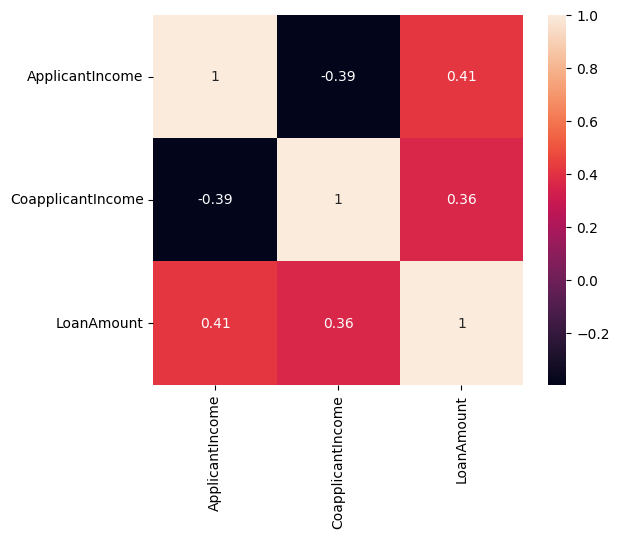

In [15]:
correlation = data_without.loc[:,['ApplicantIncome','CoapplicantIncome','LoanAmount']].corr()
print("Correlation Table :")
sns.heatmap(correlation, square = True, annot = True)
plt.show()

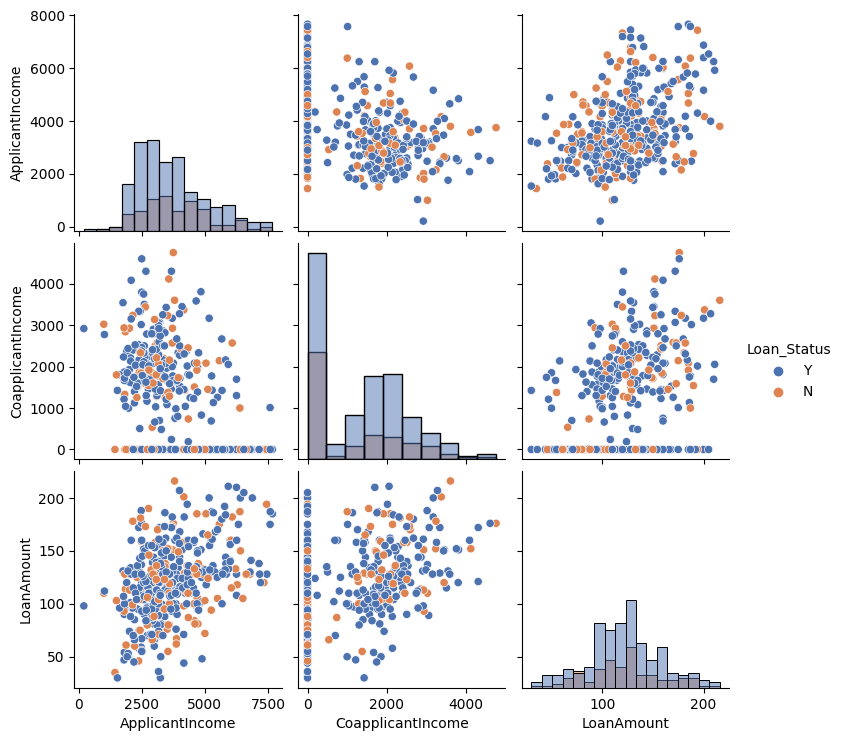

In [16]:
sns.pairplot(data_without.loc[:,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Status']],hue = 'Loan_Status', diag_kind = 'hist')
plt.show()

**Note:**
From correlation heatmap and pairplot visualization above, we can see that there is no strong relationship between each numeric features. Furthermore, we aren't able to distinguish between customer who has 'Yes' loan status and 'No' loan status based on these 3 numeric features (Applicant Income, Coapplicant Income, and Loan Amount) solely on by looking at the visualization. To address this, we'll do statistical test for these numeric features to find out whether 'Yes' loan status is different to 'No' loan status.

In [17]:
from statsmodels.multivariate.manova import MANOVA
from scipy.stats import shapiro,bartlett,levene

In [ ]:
# We conduct MANOVA statistical test to find out if Loan Status 'Yes' and 'No' are different on the average based on 3 numeric features (Applicant Income, Coapplicant Income, and Loan Amount) simultaneously
manova_result = MANOVA.from_formula('ApplicantIncome + CoapplicantIncome + LoanAmount ~ Loan_Status', data = data_without).mv_test()
print("H0 : Loan 'Yes' and 'No' are not different")
print("HI : Loan 'Yes' and 'No' are different")
print("="*25)
print("Manova result :")
print(manova_result)

**note :** From the manova test above, we can see the result fail to reject the null hypothesis with alpha or error type 1 0.05 that there is no significant difference on average based on 3 numeric features between loan status 'Yes' and 'No'. In conclusion, a person who has loan status 'Yes' is not different to a person who has loan status 'No' when it comes to these 3 numeric features (applicant income, coapplicant income, and loan amount). Next, we want to asses if the statistical method that we used satisfies assumptions to verify the test is reliable.

In [ ]:
# Normality Assumption.
loan_yes = data_without[data_without['Loan_Status'] == 'Y']
loan_no = data_without[data_without['Loan_Status'] == 'N']

# Normality Assumption for 'Yes' group.
app_yes = shapiro(loan_yes['ApplicantIncome'].values).pvalue
coapp_yes = shapiro(loan_yes['CoapplicantIncome'].values).pvalue
amount_yes = shapiro(loan_yes['LoanAmount'].values).pvalue

# Normality Assumption for 'No' group.
app_no = shapiro(loan_no['ApplicantIncome'].values).pvalue
coapp_no = shapiro(loan_no['CoapplicantIncome'].values).pvalue
amount_no = shapiro(loan_no['LoanAmount'].values).pvalue

print("Normality assumption test for 'Yes' group :")
print(f"P-val for applicant income = {app_yes}")
print(f"P-val for coapplicant income = {coapp_yes}")
print(f"P-val for loan amount = {amount_yes}")
print("="*25)
print("Normality assumption test for 'No' group :")
print(f"P-val for applicant income = {app_no}")
print(f"P-val for coapplicant income = {coapp_no}")
print(f"P-val for loan amount = {amount_no}")
print("="*25)
print(f"Number of sample for Loan status 'Yes' = {loan_yes.shape[0]}")
print(f"Number of sample for Loan status 'No' = {loan_no.shape[0]}")

In [ ]:
# Equal Variance Assumption.
app_var = levene(loan_yes['ApplicantIncome'].values,loan_no['ApplicantIncome'].values)
coapp_var = levene(loan_yes['CoapplicantIncome'].values,loan_no['CoapplicantIncome'].values)
amount_var = levene(loan_yes['LoanAmount'].values,loan_no['LoanAmount'].values)
print("Equal variance test for  applicant income :")
print(f"Statistic = {app_var.statistic} and P-val = {app_var.pvalue}")
print("="*25)
print("Equal variance test for  coapplicant income :")
print(f"Statistic = {coapp_var.statistic} and P-val = {coapp_var.pvalue}")
print("="*25)
print("Equal variance test for loan amount :")
print(f"Statistic = {amount_var.statistic} and P-val = {amount_var.pvalue}")

**Note :** There are 4 common assumptions of MANOVA : 1.Multivariate Normality, 2.Independence Samples, 3.Equal Covariance Matrix, 4. low outliers presence. First, based on the result of the normality test on each group, we find that not all group satisfy normality. that being said, if the sample for each groups is large enough, MANOVA tends to robust to this assumption. Fortunately, our samples on each groups is large enough, so we can say the first assumption is satisfied. Second, because we don't know how the data or samples are collected, we're assuming that the samples are independent and the second assumption is satisfied. Third, based on the equal variance test previously, we get the result that fail to reject the null hypothesis with an alpha = 0.05. So, the variance between each groups are equal and third assumption is satisfied. Last, the fourth assumption is already satisfied because we have removed outliers form the previous step. In conclusion, all the assumptions are satisfied and we can rely the result of MANOVA test that there is no significnat difference between loan status 'Yes' and 'No' when it comes to these 3 numeric feature (Applicant Income, Coapplicant Income, and Loan Amount).

For the next analysis, we want to see is there any factors from the categorical features that may be affecting a person has 'Yes' or 'No' loan status. We will be using chisquare or fisher exact statistical test to test the hypothesis.

In [ ]:
print(data_without.columns)

In [ ]:
cat_col = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (14,10))

sns.countplot(x = 'Gender', hue = 'Loan_Status', data = data_without, ax = ax[0,0])
sns.countplot(x = 'Married', hue = 'Loan_Status', data = data_without, ax = ax[0,1])
sns.countplot(x = 'Dependents', hue = 'Loan_Status', data = data_without, ax = ax[1,0])
sns.countplot(x = 'Education', hue = 'Loan_Status', data = data_without, ax = ax[1,1])

ax[0,0].set_title('Gender vs Loan Status')
ax[0,1].set_title('Marreid vs Loan Status')
ax[1,0].set_title('Number of Dependents vs Loan Status')
ax[1,1].set_title('Education')

plt.tight_layout()
plt.show()

**Note :** Based on visualizations above, we will try to intepret one by one.
1. Gender vs Loan Status : From the visualization, we can see that male has a tendency to be accepted for loan than female. However, male also has a tendency not to be accepted for loan than female. This information raises a question : is loan status dependent to gender? or not?. To answer this question we will use statistical test called Chi-Square test to see if 2 variabels are dependent or not. 
2. Married vs Loan Status : From the visualization, we can see that a married person has a tedency to be accepted for loan than a single person. However, a married person also has a tendency not to be accepted for loan than a single person. This information raises a question : is loan status dependent to married? or not?.
3. Dependents vs Loan Status : From the visualization, we can see that a person ho has 0 dependents has a tendency to be accepted for loan than the rest. However, a person who has 2 dependents is more likely to be accepted for loan than a person who has 1 & 3 dependents. This information raises 2 questions : First, is loan status dependent to number of depedents? or not ?. Second, What caused that a person who has 2 dependents is more likely to be accepted for loan than a person who has 1 & 3 dependents, whereas the lesser number of dependents is more likely to be accepted for loan.
4. Education vs Loan Status : From the visualization, we can see that a person who is graduated has a tedency to be accepted for loan than a person who is not graduated person. However, a person who is graduated also has a tendency not to be accepted for loan than a person who is not graduated. This information raises a question : is loan status dependent to education? or not?.

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (14,10))

sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', data = data_without, ax = ax[0,0])
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', data = data_without, ax = ax[0,1])
sns.countplot(x = 'Property_Area', hue = 'Loan_Status', data = data_without, ax = ax[1,0])
sns.countplot(x = 'Loan_Status', data = data_without, ax = ax[1,1])

ax[0,0].set_title('Self Employed vs Loan Status')
ax[0,1].set_title('Credit History vs Loan Status')
ax[1,0].set_title('Property Area vs Loan Status')
ax[1,1].set_title('Loan Status')

plt.tight_layout()
plt.show()

**Note :** Based on visualizations above, we will try to intepret one by one.
1. Self Employed vs Loan Status : From the visualization, we can see that a person who is not self-employed has a tendency to be accepted for loan than a person who is self-employed. However, a person who is not self-employed also has a tendency not to be accepted for loan than a person who is self-employed. This information raises a question : is loan status dependent to self-employment? or not?. To answer this question we will use statistical test called Chi-Square test to see if 2 variabels are dependent or not. 
2. Credit History vs Loan Status : From the visualization, we can see that a person who has a good (1) credit history has a tendency to be accepted for loan than a person who doeesn't. Furthermore, a person who has a bad credit history has tendency not to be accepted for loan. This information raises a question : is loan status dependent to credit history? or not?.
3. Property Area vs Loan Status : From the visualization, we can see that a person who lives in semiurban arean has a tendency to be accepted for loan than the rest. Furthermore, a person whow lives in semiurban area 2 has a less tendency to not be accepted for loan than the rest. This information raises a question : is loan status dependent to property area? or not ?. 
4. Loan Status Proportion: From the visualization, we can see that we have unbalanced dataset. This problem will lead to a bad performance for a model. The model will predict more the majority class than the minority and will give a wrong interpretation for model evaluation such as accuracy. To address this problem we will use sampling technique called SMOTE to balance the two classes.

## Categorical Features Analysis.
In this section we will analyze more deeper about the categorical features that might have impacts to the dependent variabel (Loan Status). We will begin from conducting statistical test to find out if two variables are dependent or not.

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
# Chi-Square test for Gender vs Loan Status.
gender_loan = data_without.groupby(['Gender','Loan_Status'])['Loan_Status'].count().unstack()
gender_results = chi2_contingency(gender_loan.values)
odds_ratio_gender = (gender_loan['Y']/gender_loan['N']).loc['Male']/(gender_loan['Y']/gender_loan['N']).loc['Female']
print("Chi-Square test result :")
print(f"Statistic\t= {gender_results[0]}")
print(f"P-val\t\t= {gender_results[1]}")
if gender_results[1] < 0.05:
    print("Decision\t= Reject the null hypothesis that 2 variabels are independent")
else:
    print("Decision\t= Fail to reject the null hypothesis that 2 variabels are independent")
print(f"Odds Ratio\t= {odds_ratio_gender}") 

**Note :** From the test above, we got a result that we fail to reject the null hypothesis that 2 variabels are independent with alpha 0.05. In addition, we can see the odds ratio is close to 1 which means that the tendency between male and female to be accepted for loan is almost same. In conclusion, we can say that loan status is not dependent to gender statistically.

In [ ]:
# Chi-Square test for Married vs Loan Status.
married_loan = data_without.groupby(['Married','Loan_Status'])['Loan_Status'].count().unstack()
married_results = chi2_contingency(married_loan.values)
odds_ratio_married = (married_loan['Y']/married_loan['N']).loc['Yes']/(married_loan['Y']/married_loan['N']).loc['No']
print("Chi-Square test result :")
print(f"Statistic\t= {married_results[0]}")
print(f"P-val\t\t= {married_results[1]}")
if married_results[1] < 0.05:
    print("Decision\t= Reject the null hypothesis that 2 variabels are independent")
else:
    print("Decision\t= Fail to reject the null hypothesis that 2 variabels are independent")
print(f"Odds Ratio\t= {odds_ratio_married}") 

**Note :** From the test above, we got a result that we fail to reject the null hypothesis that 2 variabels are independent with alpha 0.05. In addition, we can see the odds ratio is close to 1 which means that the tendency between a person who is married and a person who doesn't to be accepted for loan is almost same. In conclusion, we can say that loan status is not dependent to married status statistically.

In [ ]:
# Chi-Square test for Number of Dependents vs Loan Status.
dependents_loan = data_without.groupby(['Dependents','Loan_Status'])['Loan_Status'].count().unstack()
dependents_results = chi2_contingency(dependents_loan.values)
odds_ratio_dependents_0vs1 = (dependents_loan.loc[['0','1'],'Y']/dependents_loan.loc[['0','1'],'N']).loc['0']/(dependents_loan.loc[['0','1'],'Y']/dependents_loan.loc[['0','1'],'N']).loc['1']
odds_ratio_dependents_0vs2 = (dependents_loan.loc[['0','2'],'Y']/dependents_loan.loc[['0','2'],'N']).loc['0']/(dependents_loan.loc[['0','2'],'Y']/dependents_loan.loc[['0','2'],'N']).loc['2']
odds_ratio_dependents_0vs3 = (dependents_loan.loc[['0','3+'],'Y']/dependents_loan.loc[['0','3+'],'N']).loc['0']/(dependents_loan.loc[['0','3+'],'Y']/dependents_loan.loc[['0','3+'],'N']).loc['3+']
print("Chi-Square test result :")
print(f"Statistic\t= {dependents_results[0]}")
print(f"P-val\t\t= {dependents_results[1]}")
if dependents_results[1] < 0.05:
    print("Decision\t= Reject the null hypothesis that 2 variabels are independent")
else:
    print("Decision\t= Fail to reject the null hypothesis that 2 variabels are independent")
print(f"Odds Ratio for 0 vs 1\t= {odds_ratio_dependents_0vs1}") 
print(f"Odds Ratio for 0 vs 2\t= {odds_ratio_dependents_0vs2}") 
print(f"Odds Ratio for 0 vs 3+\t= {odds_ratio_dependents_0vs3}") 

**Note :** From the test above, we got a result that we fail to reject the null hypothesis that 2 variabels are independent with alpha 0.05. In addition, we can see the odds ratio for every levels is close to 1 which means that the tendency between a person who has 1,2, and 3+ dependents againts a person who has 0 depedents is almost same. In conclusion, we can say that loan status is not dependent to number of dependents statistically.

In [ ]:
# Chi-Square test for Education vs Loan Status.
education_loan = data_without.groupby(['Education','Loan_Status'])['Loan_Status'].count().unstack()
education_results = chi2_contingency(education_loan.values)
odds_ratio_education = (education_loan['Y']/education_loan['N']).loc['Graduate']/(education_loan['Y']/education_loan['N']).loc['Not Graduate']
print("Chi-Square test result :")
print(f"Statistic\t= {education_results[0]}")
print(f"P-val\t\t= {education_results[1]}")
if education_results[1] < 0.05:
    print("Decision\t= Reject the null hypothesis that 2 variabels are independent")
else:
    print("Decision\t= Fail to reject the null hypothesis that 2 variabels are independent")
print(f"Odds Ratio\t= {odds_ratio_education}") 

**Note :** From the test above, we got a result that we fail to reject the null hypothesis that 2 variabels are independent with alpha 0.05. In addition, we can see the odds ratio for a person who is graduated againts a person who is not graduated is near to 1 which means that the tendency to be accepted for loan is almost same. In conclusion, we can say that loan status is not dependent to education statistically.

In [ ]:
# Chi-Square test for Self Employment vs Loan Status.
employment_loan = data_without.groupby(['Self_Employed','Loan_Status'])['Loan_Status'].count().unstack()
employment_results = chi2_contingency(employment_loan.values)
odds_ratio_employment = (employment_loan['Y']/employment_loan['N']).loc['Yes']/(employment_loan['Y']/employment_loan['N']).loc['No']
print("Chi-Square test result :")
print(f"Statistic\t= {employment_results[0]}")
print(f"P-val\t\t= {employment_results[1]}")
if employment_results[1] < 0.05:
    print("Decision\t= Reject the null hypothesis that 2 variabels are independent")
else:
    print("Decision\t= Fail to reject the null hypothesis that 2 variabels are independent")
print(f"Odds Ratio\t= {odds_ratio_employment}") 

**Note :** From the test above, we got a result that we fail to reject the null hypothesis that 2 variabels are independent with alpha 0.05. In addition, we can see the odds ratio for a person who is self-employment againts a person who is not self-imployment is near to 1 which means that the tendency to be accepted for loan is almost same. In conclusion, we can say that loan status is not dependent to self-employment statistically.

In [ ]:
# Chi-Square test for Credit History vs Loan Status.
credit_loan = data_without.groupby(['Credit_History','Loan_Status'])['Loan_Status'].count().unstack()
credit_results = chi2_contingency(credit_loan.values)
odds_ratio_credit = (credit_loan['Y']/credit_loan['N']).loc[1]/(credit_loan['Y']/credit_loan['N']).loc[0]
print("Chi-Square test result :")
print(f"Statistic\t= {credit_results[0]}")
print(f"P-val\t\t= {credit_results[1]}")
if credit_results[1] < 0.05:
    print("Decision\t= Reject the null hypothesis that 2 variabels are independent")
else:
    print("Decision\t= Fail to reject the null hypothesis that 2 variabels are independent")
print(f"Odds Ratio\t= {odds_ratio_credit}") 

**Note :** From the test above, we got a result that we reject the null hypothesis that 2 variabels are independent with alpha 0.05. This means that a person who has a good credit history is likely to be accepted for loan than a person who doesn't have a good credit history.In addition, we can see the odds ratio of a person who has a good credit history againts a person who doesn't. In conclusion, we can say that loan status is dependent to credit history statistically.

In [ ]:
# Chi-Square test for Property Area vs Loan Status.
property_loan = data_without.groupby(['Property_Area','Loan_Status'])['Loan_Status'].count().unstack()
property_results = chi2_contingency(property_loan.values)
odds_ratio_property_semiurban_urban = (property_loan.loc[['Urban','Semiurban'],'Y']/property_loan.loc[['Urban','Semiurban'],'N']).loc['Semiurban']/( \
    property_loan.loc[['Urban','Semiurban'],'Y']/property_loan.loc[['Urban','Semiurban'],'N']).loc['Urban']
odds_ratio_property_semiurban_rural = (property_loan.loc[['Rural','Semiurban'],'Y']/property_loan.loc[['Rural','Semiurban'],'N']).loc['Semiurban']/( \
    property_loan.loc[['Rural','Semiurban'],'Y']/property_loan.loc[['Rural','Semiurban'],'N']).loc['Rural']
print("Chi-Square test result :")
print(f"Statistic\t= {property_results[0]}")
print(f"P-val\t\t= {property_results[1]}")
if property_results[1] < 0.05:
    print("Decision\t= Reject the null hypothesis that 2 variabels are independent")
else:
    print("Decision\t= Fail to reject the null hypothesis that 2 variabels are independent")
print(f"Odds Ratio for urban vs semi-urban\t= {odds_ratio_property_semiurban_urban}") 
print(f"Odds Ratio for rural vs semi-urban\t= {odds_ratio_property_semiurban_rural}")

**Note :** From the test above, we got a result that we reject the null hypothesis that 2 variabels are independent with alpha 0.05.In addition, we can see the odds ratio of a person who lives in semi-urban area is more likely to be accepted for loan than a person who lives in a urban or rural area. In conclusion, we can say that loan status is dependent to property area statistically. Next, We wiil take a deep look to analyze why a person who has 2 dependents is more likely to be accepted for loan than a person who has 1 & 3 dependents, whereas the lesser number of dependents is more likely to be accepted for loan.

In [ ]:
# we will add one significant features (credit history) to see if this variable affects the number of dependents feature.
g = sns.FacetGrid(data_without, row = "Credit_History", height = 5, aspect = 1.5)
g.map_dataframe(sns.countplot, x = 'Dependents')
plt.show()

**Note :** From the visualization above, we can see that a person whose number of depedendents is 2 has more good credit score counts than a person whose number of dependents are 1 & 3. Furthermore, a person whose number of dependents are 1 has more bad credit score count than a person whose number of depedents are 0, 2, and 3. From those 2 informations and the previous statistical test on credit history feature, credit history feature has an effect on number of dependents feature that will make a person whose number of dependents is 2 who is more likely to be accepted for loan than a person who has 1 & 3 dependents. In conclusion, we already found what caused the effect on why a person who has 2 dependents is more likely to be accepted for loan than a person who has 1 & 3 dependents, whereas the lesser number of dependents is more likely to be accepted for loan. However, we will take a deep look to another significant feature that is property are whether this features also has a same effect to number of dependents feature.

In [ ]:
# we will add one significant features (credit history) to see if this variable affects the number of dependents feature.
g = sns.FacetGrid(data_without, row = "Property_Area", height = 5, aspect = 1.5)
g.map_dataframe(sns.countplot, x = 'Dependents', order = ['0','1','2','3+'])
plt.show()

**Note :** From the visualization above, we can see that a person whose number of depedendents is 2 has more counts living in semi-urban area than a person whose number of dependents are 1 & 3. From that information and the previous statistical test on property area feature, property area feature may has a small effect on number of dependents feature that will make a person whose number of dependents is 2 who is more likely to be accepted for loan than a person who has 1 & 3 dependents. In conclusion, credit history and property area features has an effect on number of dependents feature why a person who has 2 dependents is more likely to be accepted for loan than a person who has 1 & 3 dependents, whereas the lesser number of dependents is more likely to be accepted for loan.

## Outliers Analysis.
In this section we will analyze more on outliers data. Outlier is an extream data value that can be very small or very large or distinc to the rests. outlier is still a valid data and may have crucial information. First, we will look the statistics of the outliers, then we will do data exploration to gain any insights.

In [ ]:
# data info and Common statistics.
print("Data dimension :")
print(outliers.shape)
print("="*25)
print("Data info :")
print(outliers.info())

In [ ]:
stats_outliers = outliers.describe().T
display(stats_outliers)

**Note :** From the table above, we already got one information that can gain an insight from the data. If we look at the credit history feauture, we can see that almost 85 % of people have a good credit history. from the previous section, we know that credit history is significant to tell whether a person can get a loan or not. So, the hypothesis is there will be more people who get a loan than people who dont. To verify our hypothesis, we need to explore the data more broadly.

In [ ]:
outliers_copy = outliers.copy()

In [ ]:
outliers_copy['Credit_History'] = outliers_copy['Credit_History'].astype(str)

In [ ]:
sns.pairplot(outliers_copy.loc[:,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_Status']], hue = 'Loan_Status', diag_kind = 'hist')
plt.show()

In [ ]:
sns.pairplot(outliers_copy.loc[:,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']], hue = 'Credit_History', diag_kind = 'hist')
plt.show()

In [ ]:
sns.pairplot(outliers_copy.loc[:,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Property_Area']], hue = 'Property_Area', diag_kind = 'hist')
plt.show()

**Note :** 

- plot 1 : there are still many outliers found on the numeric features. each of the histograms show the data is positive skewed.

- plot 2 : we can't conclude that Loan Status has different value on each level based on 4 numeric features (Applicant Income, Coapplicant Income, Loan Amount Loan Term).

- Plot 3 & 4 : We also can't conclude that each of 2 categorical features (Credit History, Property Area) has a different value based on 4 numeric features (Applicant Income, Coapplicant Income, Loan Amount, and Loan Term).

But there is a unique data point that may become an interest. First, the biggest value for applicant income (80k) got no loan, bad credit history, lives on rural area, a year loan term, and +- 380 loan. if we see the applicant income, loan amount, and loan term of this person, we may say that this person should be accepted for loan. However, this person lives in rural area and has a bad credit card history. Because these 2 categorical features (property area & credit card status) have a significant effect whether a person gets a loan or not, this makes this person doesn't get loan.

Conclusion : we can't conclude that Loan status is being influenced by the 4 numeric features (Applicant Income, Coapplicant Income, Loan Amount, and Loan term) because a person who get a loan permission and a person who dont have is almost simillar value based on the 4 numeric features. that being said, there is a unique data point who has these feautures : applicant income (80k) got no loan, bad credit history, lives on rural area, a year loan term, and +- 380 loan, but doesn't get a loan permission because this person lives in rural area and has a bad credit history. At the end, these 2 categorical features (Property Area and Credit History) are important to decide whether a person will get a permission to loan or not.






## Outliers Analysis On Categorical Features.
In this section we will take a deeper look about the data with categorical features. We are hoping to find some insights after the analysis.

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (14,10))

sns.countplot(x = 'Gender', hue = 'Loan_Status', data = outliers_copy, ax = ax[0,0])
sns.countplot(x = 'Married', hue = 'Loan_Status', data = outliers_copy, ax = ax[0,1])
sns.countplot(x = 'Dependents', hue = 'Loan_Status', data = outliers_copy, ax = ax[1,0])
sns.countplot(x = 'Education', hue = 'Loan_Status', data = outliers_copy, ax = ax[1,1])

ax[0,0].set_title('Gender vs Loan Status')
ax[0,1].set_title('Married vs Loan Status')
ax[1,0].set_title('Number of Dependents vs Loan Status')
ax[1,1].set_title('Education')

plt.tight_layout()
plt.show()

**Note :** Based on visualizations above, we will try to intepret one by one.
1. Gender vs Loan Status : From the visualization, we can see that male has a tendency to be accepted for loan than female. However, male also has a tendency not to be accepted for loan than female. This information raises a question : is loan status dependent to gender? or not?. To answer this question we will use statistical test called Chi-Square test to see if 2 variabels are dependent or not. 
2. Married vs Loan Status : From the visualization, we can see that a married person has a tedency to be accepted for loan than a single person. However, a single person has a tencdency not to be accepted for a loan based on the counts of 'No' is higher than the counts of 'Yes'. This information raises a question : is loan status dependent to married? or not?.
3. Dependents vs Loan Status : From the visualization, we can see that a person ho has 0 dependents has a tendency to be accepted for loan than the rest. However, a person who has 2 dependents is more likely to be accepted for loan than a person who has 1 & 3 dependents. This information raises 2 questions : First, is loan status dependent to number of depedents? or not ?. Second, What caused that a person who has 2 dependents is more likely to be accepted for loan than a person who has 1 & 3 dependents, whereas the lesser number of dependents is more likely to be accepted for loan.
4. Education vs Loan Status : From the visualization, we can see that a person who is graduated has a tedency to be accepted for loan than a person who is not graduated person. However, a person who is graduated also has a tendency not to be accepted for loan than a person who is not graduated. This information raises a question : is loan status dependent to education? or not?.

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (14,10))

sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', data = outliers_copy, ax = ax[0,0])
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', data = outliers_copy, ax = ax[0,1])
sns.countplot(x = 'Property_Area', hue = 'Loan_Status', data = outliers_copy, ax = ax[1,0])
sns.countplot(x = 'Loan_Status', data = outliers_copy, ax = ax[1,1])

ax[0,0].set_title('Self Employed vs Loan Status')
ax[0,1].set_title('Credit History vs Loan Status')
ax[1,0].set_title('Property Area vs Loan Status')
ax[1,1].set_title('Loan Status')

plt.tight_layout()
plt.show()

**Note :** Based on visualizations above, we will try to intepret one by one.
1. Self Employed vs Loan Status : From the visualization, we can see that a person who is not self-employed has a tendency to be accepted for loan than a person who is self-employed. However, a person who is not self-employed also has a tendency not to be accepted for loan than a person who is self-employed. This information raises a question : is loan status dependent to self-employment? or not?. To answer this question we will use statistical test called Chi-Square test to see if 2 variabels are dependent or not. 
2. Credit History vs Loan Status : From the visualization, we can see that a person who has a good (1) credit history has a tendency to be accepted for loan than a person who doeesn't. Furthermore, a person who has a bad credit history has tendency not to be accepted for loan. This information raises a question : is loan status dependent to credit history? or not?.
3. Property Area vs Loan Status : From the visualization, we can see that a person who lives in semiurban arean has a tendency to be accepted for loan than the rest. Furthermore, a person whow lives in semiurban area 2 has a less tendency to not be accepted for loan than the rest. This information raises a question : is loan status dependent to property area? or not ?. 
4. Previously, we have a hypothesis that the counts of people who get a loan permission is higher than the number of people who doesn't(based on 85 % of people have a good credit score history). If we look at the fourth visualization, we can see that the number of people who get a loan permission is higher than the number of people who doesn't. So, we can verify that our hypothesis is true.

Noted that we will no do statistical test on every pair of features because the result of visualizations have a similar pattern. However, we will do a statistical test on loan status and married feautures because it has a different pattern than the previous visualization about loan status and married.

In [ ]:
# Chi-Square test for Married vs Loan Status.
married_loan_outlier= outliers_copy.groupby(['Married','Loan_Status'])['Loan_Status'].count().unstack()
married_results_outlier= chi2_contingency(married_loan_outlier.values)
odds_ratio_married_outlier = (married_loan_outlier['Y']/married_loan_outlier['N']).loc['Yes']/(married_loan_outlier['Y']/married_loan_outlier['N']).loc['No']
print("Chi-Square test result :")
print(f"Statistic\t= {married_results_outlier[0]}")
print(f"P-val\t\t= {married_results_outlier[1]}")
if married_results_outlier[1] < 0.05:
    print("Decision\t= Reject the null hypothesis that 2 variabels are independent")
else:
    print("Decision\t= Fail to reject the null hypothesis that 2 variabels are independent")
print(f"Odds Ratio\t= {odds_ratio_married_outlier}") 

**Note :** From the test above, we reject the null hypothesis that 2 variables are independent with alpha 0.05. However, the previous test is fail to reject the null hypothesis that 2 variables are independent. it brings a question that why this is happening? to answer this quesiton , it may happen because of outliers removal process from the beginning of EDA section. Because we chose the alpha = 0.05, it might not capture most of the outliers. Hence, it caused the counts of single people with 'Yes' loan status is lower than the 'No' loan status. 

## The conclusion.
From the exploratory and explanatory process that we have done, we can conclude 3 main insights. First, there is no significant effect of all numeric features (applicant income, coapplicant income, loan amount, loan term) on loan status feature. Second, credit history and  property area are the two significant features that are best to describe whether a person gets a loan permission or not. Last but not least, from outlier analysis we can conclude that almost all features have the same effect to the data without outlier, but there is a unique data point who has these feautures : applicant income (80k) got no loan, bad credit history, lives on rural area, a year loan term, and +- 380 loan, but doesn't get a loan permission because this person lives in rural area and has a bad credit history.

# Class Balancing (Undersampling, Oversampling With SMOTENC, Undersampling & Oversampling WITH SMOTENC)
In this section, we will try to explore about class balancing technique to address imbalance class distribution in our dataset. We will try to do 3 option and compare the prediction result at the end.

In [28]:
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing  import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost as xgb
import sklearn

In [ ]:
print("Class proportion in the data :")
print(data_without['Loan_Status'].value_counts())

In [ ]:
X = data_without.copy().drop(['Loan_Status','Loan_ID'],axis = 1)
Y = data_without.copy()[['Loan_Status']]
print("Data Info\t:")
print(X.info())

## Preprocessing.

In [ ]:
X['Credit_History'] = X['Credit_History'].astype(str)
Y['Loan_Status'] = Y['Loan_Status'].replace({"Y" : 1, "N" : 0})

In [ ]:
print(X.info())

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.1, random_state = 32)
print("Training data dimension\t:")
print(f"X = {train_x.shape}")
print(f"Y = {train_y.shape}")
print("Testing data dimension\t:")
print(f"X = {test_x.shape}")
print(f"Y = {test_y.shape}")

In [ ]:
# Undersampling the majority class.
res_und = RandomUnderSampler(sampling_strategy = 0.95, random_state = 32)
x_res_und, y_res_und = res_und.fit_resample(train_x,train_y)

# Oversampling the minority class.
res_over = SMOTENC(sampling_strategy = 1, categorical_features = [0,1,2,3,4,9,10], random_state = 32, k_neighbors = 5)
x_res_over, y_res_over = res_over.fit_resample(train_x,train_y)

# Oversampling the minority class.
res_over_under_1 = SMOTENC(sampling_strategy = 0.9, categorical_features = [0,1,2,3,4,9,10], random_state = 32, k_neighbors = 5)
x_res_over_under_1, y_res_over_under_1= res_over_under_1.fit_resample(train_x,train_y)

res_over_under_2 = RandomUnderSampler(sampling_strategy = 0.9, random_state = 32)
x_res_over_under_2, y_res_over_under_2= res_over_under_2.fit_resample(x_res_over_under_1,y_res_over_under_1)

In [ ]:
# Class Proportion For Undersampling.
print("Class proportion for undersampling :")
print(f"No\t= {y_res_und.value_counts().loc[0].values}")
print(f"Yes\t= {y_res_und.value_counts().loc[1].values}") 
print("="*20)
# Class Proportion For Oversampling.
print("Class proportion for Oversampling :")
print(f"No\t= {y_res_over.value_counts().loc[0].values}")
print(f"Yes\t= {y_res_over.value_counts().loc[1].values}") 
print("="*20)
# Class Proportion For Oversampling and Undersampling.
print("Class proportion for oversampling & undersampling :")
print(f"No\t= {y_res_over_under_2.value_counts().loc[0].values}")
print(f"Yes\t= {y_res_over_under_2.value_counts().loc[1].values}") 
print("="*20)

In [ ]:
# Standardize the numerical data.
sc_under = StandardScaler()
sc_over  = StandardScaler()
sc_over_under = StandardScaler()
test_x_under, test_y_under = (test_x.copy(),test_y.copy())
test_x_over, test_y_over = (test_x.copy(), test_y.copy())
test_x_over_under, test_y_over_under = (test_x.copy(), test_y.copy())
                                        
# For undersampling.
x_res_und.loc[:,['LoanAmount','Loan_Amount_Term','ApplicantIncome','CoapplicantIncome']] = sc_under.fit_transform(x_res_und.loc[:,['LoanAmount','Loan_Amount_Term','ApplicantIncome','CoapplicantIncome']])
test_x_under.loc[:, ['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']] = sc_under.transform(test_x_under.loc[:, ['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']])

# For oversampling.
x_res_over.loc[:,['LoanAmount','Loan_Amount_Term','ApplicantIncome','CoapplicantIncome']]= sc_over.fit_transform(x_res_over.loc[:,['LoanAmount','Loan_Amount_Term','ApplicantIncome','CoapplicantIncome']])
test_x_over.loc[:, ['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']] = sc_over.transform(test_x_over.loc[:, ['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']])


# For oversampling and undersampling.
x_res_over_under_2.loc[:,['LoanAmount','Loan_Amount_Term','ApplicantIncome','CoapplicantIncome']]= sc_over_under.fit_transform(x_res_over_under_2.loc[:,['LoanAmount','Loan_Amount_Term','ApplicantIncome','CoapplicantIncome']])
test_x_over_under.loc[:, ['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']] = sc_over_under.transform(test_x_over_under.loc[:, ['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']])

In [ ]:
# data undersamplling
display(x_res_und.head())

In [ ]:
# data oversampling
display(x_res_over.head())

In [ ]:
# data oversampling and undersampling
display(x_res_over_under_2.head())

In [ ]:
# Data Preprocessing for every sampling techniques and testing data.

# Undersampling.
x_res_und['Gender'] = x_res_und['Gender'].replace({'Male' : 1, 'Female' : 0})
x_res_und['Married'] = x_res_und['Married'].replace({'Yes' : 1, 'No' : 0})
x_res_und['Dependents'] = x_res_und['Dependents'].replace({'0' : 0, '1' : 1, '2' : 2, '3+' : 3})
x_res_und['Education'] = x_res_und['Education'].replace({'Graduate' : 1, 'Not Graduate' : 0})
x_res_und['Self_Employed'] = x_res_und['Self_Employed'].replace({'Yes' : 1, 'No' : 0})
x_res_und['Credit_History'] = x_res_und['Credit_History'].astype(int)

test_x_under['Gender'] = test_x_under['Gender'].replace({'Male' : 1, 'Female' : 0})
test_x_under['Married'] = test_x_under['Married'].replace({'Yes' : 1, 'No' : 0})
test_x_under['Dependents'] = test_x_under['Dependents'].replace({'0' : 0, '1' : 1, '2' : 2, '3+' : 3})
test_x_under['Education'] = test_x_under['Education'].replace({'Graduate' : 1, 'Not Graduate' : 0})
test_x_under['Self_Employed'] = test_x_under['Self_Employed'].replace({'Yes' : 1, 'No' : 0})
test_x_under['Credit_History'] = test_x_under['Credit_History'].astype(int)

# oversampling.
x_res_over['Gender'] = x_res_over['Gender'].replace({'Male' : 1, 'Female' : 0})
x_res_over['Married'] = x_res_over['Married'].replace({'Yes' : 1, 'No' : 0})
x_res_over['Dependents'] = x_res_over['Dependents'].replace({'0' : 0, '1' : 1, '2' : 2, '3+' : 3})
x_res_over['Education'] = x_res_over['Education'].replace({'Graduate' : 1, 'Not Graduate' : 0})
x_res_over['Self_Employed'] = x_res_over['Self_Employed'].replace({'Yes' : 1, 'No' : 0})
x_res_over['Credit_History'] = x_res_over['Credit_History'].astype(int)
test_x_over['Gender'] = test_x_over['Gender'].replace({'Male' : 1, 'Female' : 0})
test_x_over['Married'] = test_x_over['Married'].replace({'Yes' : 1, 'No' : 0})
test_x_over['Dependents'] = test_x_over['Dependents'].replace({'0' : 0, '1' : 1, '2' : 2, '3+' : 3})
test_x_over['Education'] = test_x_over['Education'].replace({'Graduate' : 1, 'Not Graduate' : 0})
test_x_over['Self_Employed'] = test_x_over['Self_Employed'].replace({'Yes' : 1, 'No' : 0})
test_x_over['Credit_History'] = test_x_over['Credit_History'].astype(int)

# oversampling.
x_res_over_under_2['Gender'] = x_res_over_under_2['Gender'].replace({'Male' : 1, 'Female' : 0})
x_res_over_under_2['Married'] = x_res_over_under_2['Married'].replace({'Yes' : 1, 'No' : 0})
x_res_over_under_2['Dependents'] = x_res_over_under_2['Dependents'].replace({'0' : 0, '1' : 1, '2' : 2, '3+' : 3})
x_res_over_under_2['Education'] = x_res_over_under_2['Education'].replace({'Graduate' : 1, 'Not Graduate' : 0})
x_res_over_under_2['Self_Employed'] = x_res_over_under_2['Self_Employed'].replace({'Yes' : 1, 'No' : 0})
x_res_over_under_2['Credit_History'] = x_res_over_under_2['Credit_History'].astype(int)
test_x_over_under['Gender'] = test_x_over_under['Gender'].replace({'Male' : 1, 'Female' : 0})
test_x_over_under['Married'] = test_x_over_under['Married'].replace({'Yes' : 1, 'No' : 0})
test_x_over_under['Dependents'] = test_x_over_under['Dependents'].replace({'0' : 0, '1' : 1, '2' : 2, '3+' : 3})
test_x_over_under['Education'] = test_x_over_under['Education'].replace({'Graduate' : 1, 'Not Graduate' : 0})
test_x_over_under['Self_Employed'] = test_x_over_under['Self_Employed'].replace({'Yes' : 1, 'No' : 0})
test_x_over_under['Credit_History'] = test_x_over_under['Credit_History'].astype(int)

In [ ]:
# One-Hot Encoding  for the categorical features
x_res_und  = pd.get_dummies(x_res_und, drop_first = True)
x_res_over = pd.get_dummies(x_res_over, drop_first = True)
x_res_over_under_2 = pd.get_dummies(x_res_over_under_2, drop_first = True)
test_x_under = pd.get_dummies(test_x_under, drop_first = True)
test_x_over = pd.get_dummies(test_x_over, drop_first = True)
test_x_over_under = pd.get_dummies(test_x_over_under, drop_first = True)

In [ ]:
# Data info
print("Data for undersampling :")
print(x_res_und.info())
print("="*25)
print("Data for oversampling :")
print(x_res_over.info())
print("="*25)
print("Data for oversampling and undersampling :")
print(x_res_over_under_2.info())
print("="*25)

# Model Building

In [ ]:
# Building models with defaut parameters and evaluate the classification report.
dt = DecisionTreeClassifier(random_state = 32)
rf = RandomForestClassifier(random_state = 32, n_jobs = -1)
logreg = LogisticRegression()
svc = SVC()

## Classifier = Decision Tree

In [ ]:
# Model for undersampling.
y_pred_train_under = dt.fit(x_res_und,y_res_und).predict(x_res_und)
y_pred_test_under = dt.predict(test_x_under)
clf_report_under = classification_report(y_res_und, y_pred_train_under)
clf_report_under_test = classification_report(test_y_under, y_pred_test_under)
roc_score_under = roc_auc_score(y_res_und,y_pred_train_under)
roc_score_under_test = roc_auc_score(test_y_under, y_pred_test_under)
cv_result_under = np.mean(cross_val_score(dt, X = x_res_und, y = y_res_und, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_dt_under = np.round(precision_score(test_y_under, y_pred_test_under), 2)
recall_dt_under = np.round(recall_score(test_y_under, y_pred_test_under), 2)
accuracy_dt_under = np.round(accuracy_score(test_y_under, y_pred_test_under), 2)


# Model for oversampling.
y_pred_train_over = dt.fit(x_res_over,y_res_over).predict(x_res_over)
y_pred_test_over = dt.predict(test_x_over)
clf_report_over = classification_report(y_res_over, y_pred_train_over)
clf_report_over_test = classification_report(test_y_over, y_pred_test_over)
roc_score_over = roc_auc_score(y_res_over,y_pred_train_over)
roc_score_over_test = roc_auc_score(test_y_over, y_pred_test_over)
cv_result_over = np.mean(cross_val_score(dt, X = x_res_over, y = y_res_over, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_dt_over = np.round(precision_score(test_y_over, y_pred_test_over), 2)
recall_dt_over = np.round(recall_score(test_y_over, y_pred_test_over), 2)
accuracy_dt_over = np.round(accuracy_score(test_y_over, y_pred_test_over), 2)

# Model for oversampling & undersampling.
y_pred_train_over_under = dt.fit(x_res_over_under_2,y_res_over_under_2).predict(x_res_over_under_2)
y_pred_test_over_under = dt.predict(test_x_over_under)
clf_report_over_under = classification_report(y_res_over_under_2, y_pred_train_over_under)
clf_report_over_under_test = classification_report(test_y_over_under, y_pred_test_over_under)
roc_score_over_under = roc_auc_score(y_res_over_under_2,y_pred_train_over_under)
roc_score_over_under_test = roc_auc_score(test_y_over_under, y_pred_test_over_under)
cv_result_over_under = np.mean(cross_val_score(dt, X = x_res_over_under_2, y = y_res_over_under_2, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_dt_over_under = np.round(precision_score(test_y_over_under, y_pred_test_over_under), 2)
recall_dt_over_under = np.round(recall_score(test_y_over_under, y_pred_test_over_under), 2)
accuracy_dt_over_under = np.round(accuracy_score(test_y_over_under, y_pred_test_over_under), 2)

In [ ]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report :")
print(clf_report_under)
print("="*25)
print("ROC AUC Score :")
print(roc_score_under)
print("="*25)
print("Cross validation result :")
print(cv_result_under)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_under_test)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_under_test)

In [ ]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report :")
print(clf_report_over)
print("="*25)
print("ROC AUC Score :")
print(roc_score_over)
print("="*25)
print("Cross validation result :")
print(cv_result_over)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_over_test)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_over_test)

In [ ]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report :")
print(clf_report_over_under)
print("="*25)
print("ROC AUC Score :")
print(roc_score_over_under)
print("="*25)
print("Cross validation result :")
print(cv_result_over_under)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_over_under_test)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_over_under_test)

## Classifier : Random Forest

In [ ]:
# Model for undersampling.
y_pred_train_under_rf = rf.fit(x_res_und,np.ravel(y_res_und)).predict(x_res_und)
y_pred_test_under_rf = rf.predict(test_x_under)
clf_report_under_rf = classification_report(y_res_und, y_pred_train_under_rf)
clf_report_under_test_rf = classification_report(test_y_under, y_pred_test_under_rf)
roc_score_under_rf = roc_auc_score(y_res_und,y_pred_train_under_rf)
roc_score_under_test_rf = roc_auc_score(test_y_under, y_pred_test_under_rf)
cv_result_under_rf = np.mean(cross_val_score(rf, X = x_res_und, y = y_res_und, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_rf_under = np.round(precision_score(test_y_under, y_pred_test_under_rf), 2)
recall_rf_under = np.round(recall_score(test_y_under, y_pred_test_under_rf), 2)
accuracy_rf_under = np.round(accuracy_score(test_y_under, y_pred_test_under_rf), 2)


# Model for oversampling.
y_pred_train_over_rf = rf.fit(x_res_over,np.ravel(y_res_over)).predict(x_res_over)
y_pred_test_over_rf = rf.predict(test_x_over)
clf_report_over_rf = classification_report(y_res_over, y_pred_train_over_rf)
clf_report_over_test_rf = classification_report(test_y_over, y_pred_test_over_rf)
roc_score_over_rf = roc_auc_score(y_res_over,y_pred_train_over_rf)
roc_score_over_test_rf = roc_auc_score(test_y_over, y_pred_test_over)
cv_result_over_rf = np.mean(cross_val_score(rf, X = x_res_over, y = y_res_over, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_rf_over = np.round(precision_score(test_y_over, y_pred_test_over_rf), 2)
recall_rf_over = np.round(recall_score(test_y_over, y_pred_test_over_rf), 2)
accuracy_rf_over = np.round(accuracy_score(test_y_over, y_pred_test_over_rf), 2)

# Model for oversampling & undersampling.
y_pred_train_over_under_rf = rf.fit(x_res_over_under_2,np.ravel(y_res_over_under_2)).predict(x_res_over_under_2)
y_pred_test_over_under_rf = rf.predict(test_x_over_under)
clf_report_over_under_rf = classification_report(y_res_over_under_2, y_pred_train_over_under_rf)
clf_report_over_under_test_rf = classification_report(test_y_over_under, y_pred_test_over_under_rf)
roc_score_over_under_rf = roc_auc_score(y_res_over_under_2,y_pred_train_over_under_rf)
roc_score_over_under_test_rf = roc_auc_score(test_y_over_under, y_pred_test_over_under_rf)
cv_result_over_under_rf = np.mean(cross_val_score(rf, X = x_res_over_under_2, y = y_res_over_under_2, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_rf_over_under = np.round(precision_score(test_y_over_under, y_pred_test_over_under_rf), 2)
recall_rf_over_under = np.round(recall_score(test_y_over_under, y_pred_test_over_under_rf), 2)
accuracy_rf_over_under = np.round(accuracy_score(test_y_over_under, y_pred_test_over_under_rf), 2)

In [ ]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report :")
print(clf_report_under_rf)
print("="*25)
print("ROC AUC Score :")
print(roc_score_under_rf)
print("="*25)
print("Cross validation result :")
print(cv_result_under_rf)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_under_test_rf)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_under_test_rf)

In [ ]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report :")
print(clf_report_over_rf)
print("="*25)
print("ROC AUC Score :")
print(roc_score_over_rf)
print("="*25)
print("Cross validation result :")
print(cv_result_over_rf)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_over_test_rf)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_over_test_rf)

In [ ]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report :")
print(clf_report_over_under_rf)
print("="*25)
print("ROC AUC Score :")
print(roc_score_over_under_rf)
print("="*25)
print("Cross validation result :")
print(cv_result_over_under_rf)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_over_under_test_rf)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_over_under_test_rf)

## Classifier : Logistic Regression

In [ ]:
# Model for undersampling.
y_pred_train_under_logreg = logreg.fit(x_res_und,np.ravel(y_res_und)).predict(x_res_und)
y_pred_test_under_logreg = logreg.predict(test_x_under)
clf_report_under_logreg = classification_report(y_res_und, y_pred_train_under_logreg)
clf_report_under_test_logreg = classification_report(test_y_under, y_pred_test_under_logreg)
roc_score_under_logreg = roc_auc_score(y_res_und,y_pred_train_under_logreg)
roc_score_under_test_logreg = roc_auc_score(test_y_under, y_pred_test_under_logreg)
cv_result_under_logreg = np.mean(cross_val_score(logreg, X = x_res_und, y = y_res_und, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_logreg_under = np.round(precision_score(test_y_under, y_pred_test_under_logreg), 2)
recall_logreg_under = np.round(recall_score(test_y_under, y_pred_test_under_logreg), 2)
accuracy_logreg_under = np.round(accuracy_score(test_y_under, y_pred_test_under_logreg), 2)


# Model for oversampling.
y_pred_train_over_logreg = logreg.fit(x_res_over,np.ravel(y_res_over)).predict(x_res_over)
y_pred_test_over_logreg = logreg.predict(test_x_over)
clf_report_over_logreg = classification_report(y_res_over, y_pred_train_over_logreg)
clf_report_over_test_logreg = classification_report(test_y_over, y_pred_test_over_logreg)
roc_score_over_logreg = roc_auc_score(y_res_over,y_pred_train_over_logreg)
roc_score_over_test_logreg = roc_auc_score(test_y_over, y_pred_test_over_logreg)
cv_result_over_logreg = np.mean(cross_val_score(logreg, X = x_res_over, y = y_res_over, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_logreg_over = np.round(precision_score(test_y_over, y_pred_test_over_logreg), 2)
recall_logreg_over = np.round(recall_score(test_y_over, y_pred_test_over_logreg), 2)
accuracy_logreg_over = np.round(accuracy_score(test_y_over, y_pred_test_over_logreg), 2)

# Model for oversampling & undersampling.
y_pred_train_over_under_logreg = logreg.fit(x_res_over_under_2,np.ravel(y_res_over_under_2)).predict(x_res_over_under_2)
y_pred_test_over_under_logreg = logreg.predict(test_x_over_under)
clf_report_over_under_logreg = classification_report(y_res_over_under_2, y_pred_train_over_under_logreg)
clf_report_over_under_test_logreg = classification_report(test_y_over_under, y_pred_test_over_under_logreg)
roc_score_over_under_logreg = roc_auc_score(y_res_over_under_2,y_pred_train_over_under_logreg)
roc_score_over_under_test_logreg = roc_auc_score(test_y_over_under, y_pred_test_over_under_logreg)
cv_result_over_under_logreg = np.mean(cross_val_score(logreg, X = x_res_over_under_2, y = y_res_over_under_2, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_logreg_over_under = np.round(precision_score(test_y_over_under, y_pred_test_over_under_logreg), 2)
recall_logreg_over_under = np.round(recall_score(test_y_over_under, y_pred_test_over_under_logreg), 2)
accuracy_logreg_over_under = np.round(accuracy_score(test_y_over_under, y_pred_test_over_under_logreg), 2)

In [ ]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report :")
print(clf_report_under_logreg)
print("="*25)
print("ROC AUC Score :")
print(roc_score_under_logreg)
print("="*25)
print("Cross validation result :")
print(cv_result_under_logreg)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_under_test_logreg)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_under_test_logreg)

In [ ]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report :")
print(clf_report_over_logreg)
print("="*25)
print("ROC AUC Score :")
print(roc_score_over_logreg)
print("="*25)
print("Cross validation result :")
print(cv_result_over_logreg)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_over_test_logreg)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_over_test_logreg)

In [ ]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report :")
print(clf_report_over_under_logreg)
print("="*25)
print("ROC AUC Score :")
print(roc_score_over_under_logreg)
print("="*25)
print("Cross validation result :")
print(cv_result_over_under_logreg)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_over_under_test_logreg)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_over_under_test_logreg)

## Classifier : Support Vector Classifier

In [ ]:
# Model for undersampling.
y_pred_train_under_svc = svc.fit(x_res_und,np.ravel(y_res_und)).predict(x_res_und)
y_pred_test_under_svc = svc.predict(test_x_under)
clf_report_under_svc = classification_report(y_res_und, y_pred_train_under_svc)
clf_report_under_test_svc = classification_report(test_y_under, y_pred_test_under_svc)
roc_score_under_svc = roc_auc_score(y_res_und,y_pred_train_under_svc)
roc_score_under_test_svc = roc_auc_score(test_y_under, y_pred_test_under_svc)
cv_result_under_svc = np.mean(cross_val_score(svc, X = x_res_und, y = y_res_und, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_svc_under = np.round(precision_score(test_y_under, y_pred_test_under_svc), 2)
recall_svc_under = np.round(recall_score(test_y_under, y_pred_test_under_svc), 2)
accuracy_svc_under = np.round(accuracy_score(test_y_under, y_pred_test_under_svc), 2)


# Model for oversampling.
y_pred_train_over_svc = svc.fit(x_res_over,np.ravel(y_res_over)).predict(x_res_over)
y_pred_test_over_svc = svc.predict(test_x_over)
clf_report_over_svc = classification_report(y_res_over, y_pred_train_over_svc)
clf_report_over_test_svc = classification_report(test_y_over, y_pred_test_over_svc)
roc_score_over_svc = roc_auc_score(y_res_over,y_pred_train_over_svc)
roc_score_over_test_svc = roc_auc_score(test_y_over, y_pred_test_over_svc)
cv_result_over_svc = np.mean(cross_val_score(svc, X = x_res_over, y = y_res_over, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_svc_over = np.round(precision_score(test_y_over, y_pred_test_over_svc), 2)
recall_svc_over = np.round(recall_score(test_y_over, y_pred_test_over_svc), 2)
accuracy_svc_over = np.round(accuracy_score(test_y_over, y_pred_test_over_svc), 2)

# Model for oversampling & undersampling.
y_pred_train_over_under_svc = svc.fit(x_res_over_under_2,np.ravel(y_res_over_under_2)).predict(x_res_over_under_2)
y_pred_test_over_under_svc = svc.predict(test_x_over_under)
clf_report_over_under_svc = classification_report(y_res_over_under_2, y_pred_train_over_under_svc)
clf_report_over_under_test_svc = classification_report(test_y_over_under, y_pred_test_over_under_svc)
roc_score_over_under_svc = roc_auc_score(y_res_over_under_2,y_pred_train_over_under_svc)
roc_score_over_under_test_svc = roc_auc_score(test_y_over_under, y_pred_test_over_under_svc)
cv_result_over_under_svc = np.mean(cross_val_score(svc, X = x_res_over_under_2, y = y_res_over_under_2, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_svc_over_under = np.round(precision_score(test_y_over_under, y_pred_test_over_under_svc), 2)
recall_svc_over_under = np.round(recall_score(test_y_over_under, y_pred_test_over_under_svc), 2)
accuracy_svc_over_under = np.round(accuracy_score(test_y_over_under, y_pred_test_over_under_svc), 2)

In [ ]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report :")
print(clf_report_under_svc)
print("="*25)
print("ROC AUC Score :")
print(roc_score_under_svc)
print("="*25)
print("Cross validation result :")
print(cv_result_under_svc)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_under_test_svc)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_under_test_svc)

In [ ]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report :")
print(clf_report_over_svc)
print("="*25)
print("ROC AUC Score :")
print(roc_score_over_svc)
print("="*25)
print("Cross validation result :")
print(cv_result_over_svc)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_over_test_svc)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_over_test_svc)

In [ ]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report :")
print(clf_report_over_under_svc)
print("="*25)
print("ROC AUC Score :")
print(roc_score_over_under_svc)
print("="*25)
print("Cross validation result :")
print(cv_result_over_under_svc)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_over_under_test_svc)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_over_under_test_svc)

In [ ]:
report_evaluation = {'Model'           : ['Decision Tree','Decision Tree','Decision Tree','Random Forest','Random Forest','Random Forest','Logistic Regression','Logistic Regression','Logistic Regression','SVC','SVC','SVC'],
                     'Sampling Method' : ['Under','Over','Over & Under','Under','Over','Over & Under','Under','Over','Over & Under','Under','Over','Over & Under'],
                     'Precision Score' : [precision_dt_under,precision_dt_over,precision_dt_over_under,precision_rf_under,precision_rf_over, precision_rf_over_under, precision_logreg_under, precision_logreg_over,
                                           precision_logreg_over_under, precision_svc_under, precision_svc_over, precision_svc_over_under],
                     'Recall Score'    : [recall_dt_under,recall_dt_over,recall_dt_over_under,recall_rf_under,recall_rf_over, recall_rf_over_under, recall_logreg_under, recall_logreg_over,
                                           recall_logreg_over_under, recall_svc_under, recall_svc_over, recall_svc_over_under],
                     'Accuracy Score'  : [accuracy_dt_under, accuracy_dt_over, accuracy_dt_over_under, accuracy_rf_under, accuracy_rf_over, accuracy_rf_over_under, accuracy_logreg_under, accuracy_logreg_over,
                                           accuracy_logreg_over_under, accuracy_svc_under, accuracy_svc_over, accuracy_svc_over_under]}

In [ ]:
df_report = pd.DataFrame(report_evaluation)
df_report.set_index(['Model','Sampling Method'], inplace = True)
df_report.T

In [ ]:
print(df_report.T.mean(axis = 0))

**Note :** From the report above, we can see that sampling method with under and over has a tedency to have better evaluation scores. So, we'll use this sampling technique for our model. Next, we will do feature selection and feature engineering based on feature importance from random forest.

In [ ]:
# Display Feature Importance with random Forest.

features_name = rf.feature_names_in_
features_importance = rf.feature_importances_

print(features_name)
print(features_importance)

In [ ]:
features_importance_sorted = np.sort(features_importance)
features_name_sorted = features_name[np.argsort(features_importance)]

In [ ]:
fig, ax = plt.subplots(figsize = (5,10))
ax.barh(y = np.arange(len(features_name)), width = features_importance_sorted)
ax.set_yticks(np.arange(len(features_name)))
ax.set_yticklabels(features_name_sorted)
ax.set_title('Feature Importance')
plt.show()

**Note :** From the visualization of feature importance above, we can see that Applicant Income, Credit History, Loan Amount, and Coapplicants Income have more importance score than the rest. This meeans that these four features are better to describe Loan Status than other features. Moreover, we can see that Loan Amount Term has 0 importance score which means this features is not good enough to describe Loan Status. From those information, we can do feauture engineering (Combining 2 features or more to create new feature or delete some features that may not be useful)  to tweak our model for better performance. Next, we want to apply this feature engineering method on our model.

In [ ]:
# Lets take out Loan Term and combine Applicant and Coapplicant Income for each sampling techniques.
display(X.head())

In [ ]:
X.drop(columns = 'Loan_Amount_Term', inplace = True)
X['Income Combined'] = X['ApplicantIncome'] + X['CoapplicantIncome']
X.drop(columns = ['ApplicantIncome','CoapplicantIncome'], inplace = True)
display(X.head())

In [ ]:
print(X.info())

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.1, random_state = 32)
print("Training data dimension\t:")
print(f"X = {train_x.shape}")
print(f"Y = {train_y.shape}")
print("Testing data dimension\t:")
print(f"X = {test_x.shape}")
print(f"Y = {test_y.shape}")

In [ ]:
# Oversampling the minority class and undersampling the majority class.
res_over_under_1 = SMOTENC(sampling_strategy = 0.9, categorical_features = [0,1,2,3,4,6,7], random_state = 32, k_neighbors = 5)
x_res_over_under_1, y_res_over_under_1= res_over_under_1.fit_resample(train_x,train_y)

res_over_under_2 = RandomUnderSampler(sampling_strategy = 0.9, random_state = 32)
x_res_over_under_2, y_res_over_under_2= res_over_under_2.fit_resample(x_res_over_under_1,y_res_over_under_1)

In [ ]:
# Class Proportion For Oversampling and Undersampling.
print("Class proportion for oversampling & undersampling :")
print(f"No\t= {y_res_over_under_2.value_counts().loc[0].values}")
print(f"Yes\t= {y_res_over_under_2.value_counts().loc[1].values}") 
print("="*20)

In [ ]:
sc_over_under = StandardScaler()
# For oversampling and undersampling.
x_res_over_under_2.loc[:,['LoanAmount','Income Combined']]= sc_over_under.fit_transform(x_res_over_under_2.loc[:,['LoanAmount','Income Combined']])
test_x.loc[:, ['LoanAmount', 'Income Combined']] = sc_over_under.transform(test_x.loc[:, ['LoanAmount', 'Income Combined']])

In [ ]:
display(x_res_over_under_2.head())

In [ ]:
# oversampling and undersampling.
x_res_over_under_2['Gender'] = x_res_over_under_2['Gender'].replace({'Male' : 1, 'Female' : 0})
x_res_over_under_2['Married'] = x_res_over_under_2['Married'].replace({'Yes' : 1, 'No' : 0})
x_res_over_under_2['Dependents'] = x_res_over_under_2['Dependents'].replace({'0' : 0, '1' : 1, '2' : 2, '3+' : 3})
x_res_over_under_2['Education'] = x_res_over_under_2['Education'].replace({'Graduate' : 1, 'Not Graduate' : 0})
x_res_over_under_2['Self_Employed'] = x_res_over_under_2['Self_Employed'].replace({'Yes' : 1, 'No' : 0})
x_res_over_under_2['Credit_History'] = x_res_over_under_2['Credit_History'].astype(int)
test_x['Gender'] = test_x['Gender'].replace({'Male' : 1, 'Female' : 0})
test_x['Married'] = test_x['Married'].replace({'Yes' : 1, 'No' : 0})
test_x['Dependents'] = test_x['Dependents'].replace({'0' : 0, '1' : 1, '2' : 2, '3+' : 3})
test_x['Education'] = test_x['Education'].replace({'Graduate' : 1, 'Not Graduate' : 0})
test_x['Self_Employed'] = test_x['Self_Employed'].replace({'Yes' : 1, 'No' : 0})
test_x['Credit_History'] = test_x['Credit_History'].astype(int)

In [ ]:
# One-Hot Encoding  for the categorical features
x_res_over_under_2 = pd.get_dummies(x_res_over_under_2, drop_first = True)
test_x = pd.get_dummies(test_x, drop_first = True)

In [ ]:
display(x_res_over_under_2.head())

In [ ]:
display(test_x.head())

In [ ]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state = 32)
logreg = LogisticRegression()
svc = SVC()

## Classifier : Decision Tree

In [ ]:
y_train_pred_dt = dt.fit(x_res_over_under_2,y_res_over_under_2).predict(x_res_over_under_2)
y_test_pred_dt  = dt.predict(test_x)
clf_report_train_dt= classification_report(y_res_over_under_2, y_train_pred_dt)
clf_report_test_dt = classification_report(test_y, y_test_pred_dt)
roc_score_train_dt = roc_auc_score(y_res_over_under_2,y_train_pred_dt)
roc_score_test_dt = roc_auc_score(test_y, y_test_pred_dt)
cv_result_dt = np.mean(cross_val_score(dt, X = x_res_over_under_2, y = y_res_over_under_2, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_dt = np.round(precision_score(test_y, y_test_pred_dt), 2)
recall_dt = np.round(recall_score(test_y, y_test_pred_dt), 2)
accuracy_dt = np.round(accuracy_score(test_y, y_test_pred_dt), 2)

In [ ]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report Training :")
print(clf_report_train_dt)
print("="*25)
print("ROC AUC Score for Training Data:")
print(roc_score_train_dt)
print("="*25)
print("Cross validation result :")
print(cv_result_dt)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_test_dt)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_test_dt)

In [ ]:
print(precision_dt)
print(recall_dt)

## Classifier : Random Forest

In [ ]:
y_train_pred_rf = rf.fit(x_res_over_under_2,np.ravel(y_res_over_under_2)).predict(x_res_over_under_2)
y_test_pred_rf  = rf.predict(test_x)
clf_report_train_rf= classification_report(y_res_over_under_2, y_train_pred_rf)
clf_report_test_rf = classification_report(test_y, y_test_pred_rf)
roc_score_train_rf = roc_auc_score(y_res_over_under_2,y_train_pred_rf)
roc_score_test_rf = roc_auc_score(test_y, y_test_pred_rf)
cv_result_rf = np.mean(cross_val_score(rf, X = x_res_over_under_2, y = y_res_over_under_2, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_rf = np.round(precision_score(test_y, y_test_pred_rf), 2)
recall_rf = np.round(recall_score(test_y, y_test_pred_rf), 2)
accuracy_rf = np.round(accuracy_score(test_y, y_test_pred_rf), 2)

In [ ]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report Training :")
print(clf_report_train_rf)
print("="*25)
print("ROC AUC Score for Training Data:")
print(roc_score_train_rf)
print("="*25)
print("Cross validation result :")
print(cv_result_rf)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_test_rf)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_test_rf)

## Classifier : Logistic Regression

In [ ]:
y_train_pred_logreg = logreg.fit(x_res_over_under_2,np.ravel(y_res_over_under_2)).predict(x_res_over_under_2)
y_test_pred_logreg  = logreg.predict(test_x)
clf_report_train_logreg = classification_report(y_res_over_under_2, y_train_pred_logreg)
clf_report_test_logreg = classification_report(test_y, y_test_pred_logreg)
roc_score_train_logreg = roc_auc_score(y_res_over_under_2,y_train_pred_logreg)
roc_score_test_logreg = roc_auc_score(test_y, y_test_pred_logreg)
cv_result_logreg = np.mean(cross_val_score(logreg, X = x_res_over_under_2, y = y_res_over_under_2, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_logreg = np.round(precision_score(test_y, y_test_pred_logreg), 2)
recall_logreg = np.round(recall_score(test_y, y_test_pred_logreg), 2)
accuracy_logreg = np.round(accuracy_score(test_y, y_test_pred_logreg), 2)

In [ ]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report Training :")
print(clf_report_train_logreg)
print("="*25)
print("ROC AUC Score for Training Data:")
print(roc_score_train_logreg)
print("="*25)
print("Cross validation result :")
print(cv_result_logreg)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_test_logreg)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_test_logreg)

## Classifier : SVC

In [ ]:
y_train_pred_svc = svc.fit(x_res_over_under_2,np.ravel(y_res_over_under_2)).predict(x_res_over_under_2)
y_test_pred_svc  = svc.predict(test_x)
clf_report_train_svc = classification_report(y_res_over_under_2, y_train_pred_svc)
clf_report_test_svc = classification_report(test_y, y_test_pred_svc)
roc_score_train_svc = roc_auc_score(y_res_over_under_2,y_train_pred_svc)
roc_score_test_svc = roc_auc_score(test_y, y_test_pred_svc)
cv_result_svc = np.mean(cross_val_score(svc, X = x_res_over_under_2, y = y_res_over_under_2, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_svc = np.round(precision_score(test_y, y_test_pred_svc), 2)
recall_svc = np.round(recall_score(test_y, y_test_pred_svc), 2)
accuracy_svc = np.round(accuracy_score(test_y, y_test_pred_svc), 2)

In [ ]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report Training :")
print(clf_report_train_svc)
print("="*25)
print("ROC AUC Score for Training Data:")
print(roc_score_train_svc)
print("="*25)
print("Cross validation result :")
print(cv_result_svc)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_test_svc)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_test_svc)

In [ ]:
report_evaluation = {'Model'           : ['Decision Tree','Random Forest','Logistic Regression','SVC'],
                     'Precision Score' : [precision_dt, precision_rf, precision_logreg, precision_svc],
                     'Recall Score'    : [recall_dt, recall_rf, recall_logreg, recall_svc],
                     'Accuracy Score'  : [accuracy_dt, accuracy_rf, accuracy_logreg, accuracy_svc]}
df_report = pd.DataFrame(report_evaluation)
display(df_report)

**Note :** From the report above, we can see that feature engineering & feature selection made the performance of the model is better than the previous one. we'll proceed to improve our model's performance by tweaking its parameters. Tweakin parameters of the model is commonly called Hyperparameter Tuning. We'll try to tuning every models that we have in the next section.

# Hyperparameter Tuning

In [ ]:
# Hyperparameter tuning.
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Classifier : Decision Tree

In [ ]:
parameter_dt = {'criterion' : ['gini','entropy'],
                'splitter'  : ['best','random'],
                'min_samples_split' : [2,4,6,8],
                'max_features' : [None, 'sqrt','log2']}
dt = DecisionTreeClassifier(random_state = 32)
dt_best = GridSearchCV(estimator = dt, param_grid = parameter_dt, cv = 5, scoring = ['accuracy','f1'], refit = 'accuracy', n_jobs = 5).fit(x_res_over_under_2,np.ravel(y_res_over_under_2))
best_params = dt_best.best_params_
best_scores = dt_best.best_score_
y_pred_best = dt_best.predict(test_x)
precision_best_dt = precision_score(test_y, y_pred_best)
recall_best_dt = recall_score(test_y, y_pred_best)
accuracy_best_dt = accuracy_score(test_y, y_pred_best)

In [ ]:
print("Best Parameters :")
for key, value in best_params.items():
    print(f"{key} : {value}")
print("="*25)
print("Model Evaluation :")
print(f"Precision\t= {precision_best_dt:.2}")
print(f"Recall\t\t= {recall_best_dt:.2}")
print(f"Accuracy\t= {accuracy_best_dt:.2}")

## Classifier : Random Forest

In [ ]:
parameter_rf = {'n_estimators' : [100,200,300,400,500,600],
                'criterion' : ['gini','entropy'],
                'min_samples_split' : [2,4,6,8],
                'max_features' : [None,'sqrt','log2']}
rf = RandomForestClassifier(random_state = 32)
rf_best = GridSearchCV(estimator = rf, param_grid = parameter_rf, cv = 5, scoring = ['accuracy','f1'], refit = 'accuracy', n_jobs = 5).fit(x_res_over_under_2,np.ravel(y_res_over_under_2))
best_params_rf = rf_best.best_params_
best_scores_rf = rf_best.best_score_
y_pred_best_rf = rf_best.predict(test_x)
precision_best_rf = precision_score(test_y, y_pred_best_rf)
recall_best_rf = recall_score(test_y, y_pred_best_rf)
accuracy_best_rf = accuracy_score(test_y, y_pred_best_rf)

In [ ]:
print("Best Parameters :")
for key, value in best_params_rf.items():
    print(f"{key} : {value}")
print("="*25)
print("Model Evaluation :")
print(f"Precision\t= {precision_best_rf:.2}")
print(f"Recall\t\t= {recall_best_rf:.2}")
print(f"Accuracy\t= {accuracy_best_rf:.2}")

## Classifier : Logistic Regression

In [ ]:
parameter_logreg = {'solver' : ['lbfgs', 'liblinear'],
                'C' : np.arange(0.5,3.1, 0.25)}
logreg = LogisticRegression(random_state = 32, n_jobs = 5)
logreg_best = GridSearchCV(estimator = logreg, param_grid = parameter_logreg, cv = 5, scoring = ['accuracy','f1'], refit = 'accuracy', n_jobs = 5).fit(x_res_over_under_2,np.ravel(y_res_over_under_2))
best_params_logreg = logreg_best.best_params_
best_scores_logreg = logreg_best.best_score_
y_pred_best_logreg = logreg_best.predict(test_x)
precision_best_logreg = precision_score(test_y, y_pred_best_logreg)
recall_best_logreg = recall_score(test_y, y_pred_best_logreg)
accuracy_best_logreg = accuracy_score(test_y, y_pred_best_logreg)

In [ ]:
print("Best Parameters :")
for key, value in best_params_logreg.items():
    print(f"{key} : {value}")
print("="*25)
print("Model Evaluation :")
print(f"Precision\t= {precision_best_logreg:.2}")
print(f"Recall\t\t= {recall_best_logreg:.2}")
print(f"Accuracy\t= {accuracy_best_logreg:.2}")

In [ ]:
parameter_svc = {'kernel' : ['linear','rbf','poly','sigmoid'],
                'C' : np.arange(0.5,3.1, 0.25),
                'gamma' : ['scale','auto']}
svc = SVC(random_state = 32)
svc_best = GridSearchCV(estimator = svc, param_grid = parameter_svc, cv = 5, scoring = ['accuracy','f1'], refit = 'accuracy', n_jobs = 5).fit(x_res_over_under_2,np.ravel(y_res_over_under_2))
best_params_svc = svc_best.best_params_
best_scores_svc = svc_best.best_score_
y_pred_best_svc = svc_best.predict(test_x)
precision_best_svc = precision_score(test_y, y_pred_best_svc)
recall_best_svc = recall_score(test_y, y_pred_best_svc)
accuracy_best_svc = accuracy_score(test_y, y_pred_best_svc)

In [ ]:
print("Best Parameters :")
for key, value in best_params_svc.items():
    print(f"{key} : {value}")
print("="*25)
print("Model Evaluation :")
print(f"Precision\t= {precision_best_svc:.2}")
print(f"Recall\t\t= {recall_best_svc:.2}")
print(f"Accuracy\t= {accuracy_best_svc:.2}")

# Create a Pipeline
Now lets create a pipeline for several steps from preprocessing until hyperparameter tuning. There will be 6 pipelines for every models.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import f1_score
import xgboost as xgb

In [29]:
X = data_without.copy().drop(['Loan_Status','Loan_ID'],axis = 1)
Y = data_without.copy()[['Loan_Status']]
print("Data Info\t:")
print(X.info())

Data Info	:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             398 non-null    object 
 1   Married            398 non-null    object 
 2   Dependents         398 non-null    object 
 3   Education          398 non-null    object 
 4   Self_Employed      398 non-null    object 
 5   ApplicantIncome    398 non-null    int64  
 6   CoapplicantIncome  398 non-null    float64
 7   LoanAmount         398 non-null    float64
 8   Loan_Amount_Term   398 non-null    float64
 9   Credit_History     398 non-null    int32  
 10  Property_Area      398 non-null    object 
dtypes: float64(3), int32(1), int64(1), object(6)
memory usage: 35.8+ KB
None


In [30]:
X.drop(columns = 'Loan_Amount_Term', inplace = True)
X['Income Combined'] = X['ApplicantIncome'] + X['CoapplicantIncome']
X.drop(columns = ['ApplicantIncome','CoapplicantIncome'], inplace = True)
display(X.head())

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Income Combined
0,Male,No,0,Graduate,No,128.0,1,Urban,5849.0
1,Male,Yes,1,Graduate,No,128.0,1,Rural,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,1,Urban,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,1,Urban,4941.0
4,Male,No,0,Graduate,No,141.0,1,Urban,6000.0


In [31]:
X['Credit_History'] = X['Credit_History'].astype(str)
Y['Loan_Status'] = Y['Loan_Status'].replace({"Y" : 1, "N" : 0})

In [32]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.1, random_state = 32)
print("Training data dimension\t:")
print(f"X = {train_x.shape}")
print(f"Y = {train_y.shape}")
print("Testing data dimension\t:")
print(f"X = {test_x.shape}")
print(f"Y = {test_y.shape}")

Training data dimension	:
X = (358, 9)
Y = (358, 1)
Testing data dimension	:
X = (40, 9)
Y = (40, 1)


In [33]:
# Oversampling the minority class and undersampling the majority class.
res_over_under_1 = SMOTENC(sampling_strategy = 0.9, categorical_features = [0,1,2,3,4,6,7], random_state = 32, k_neighbors = 5)
x_res_over_under_1, y_res_over_under_1= res_over_under_1.fit_resample(train_x,train_y)

res_over_under_2 = RandomUnderSampler(sampling_strategy = 0.9, random_state = 32)
x_res_over_under_2, y_res_over_under_2= res_over_under_2.fit_resample(x_res_over_under_1,y_res_over_under_1)

In [34]:
# Class Proportion For Oversampling and Undersampling.
print("Class proportion for oversampling & undersampling :")
print(f"No\t= {y_res_over_under_2.value_counts().loc[0].values}")
print(f"Yes\t= {y_res_over_under_2.value_counts().loc[1].values}") 
print("="*20)

Class proportion for oversampling & undersampling :
No	= [232]
Yes	= [257]


In [35]:
pipe_standarscaler = Pipeline([('SC' , StandardScaler())])
pipe_onehot = Pipeline([('OHE', OneHotEncoder(drop = 'first'))])
ct_prep = ColumnTransformer(transformers = 
            [('Numeric process',pipe_standarscaler, ['LoanAmount','Income Combined']),
             ('Category process', pipe_onehot, ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area'])]
            )

In [36]:
model, precision, recall, f1_scores, accuracy = [],[],[],[],[]

## Classifier : Decision Tree

In [37]:
parameter_dt = {'DT__criterion' : ['gini','entropy'],
                'DT__splitter'  : ['best','random'],
                'DT__min_samples_split' : [2,4,6,8],
                'DT__max_features' : [None,'sqrt','log2']}

pipeline_dt = Pipeline([
            ('Preprocessing' , ct_prep),
            ('DT' , DecisionTreeClassifier(random_state = 32))])

dt_best = GridSearchCV(estimator = pipeline_dt, param_grid = parameter_dt, cv = 5, scoring = ['accuracy','f1'], refit = 'accuracy', n_jobs = 5).fit(x_res_over_under_2,y_res_over_under_2)

In [38]:
dt_cv_score = dt_best.best_score_
dt_best_params = dt_best.best_params_
dt_y_pred = dt_best.predict(test_x)
dt_precision = precision_score(test_y,dt_y_pred)
dt_recall = recall_score(test_y,dt_y_pred)
dt_f1 = f1_score(test_y, dt_y_pred)
dt_accuracy = accuracy_score(test_y, dt_y_pred)

In [39]:
print("Best parameters :")
print(f"{dt_best_params}")
print("Model evaluation :")
print(f"CV score = {dt_cv_score:.2}")
print(f"Precision = {dt_precision:.2%}")
print(f"Recall = {dt_recall:.2%}")
print(f"F1 score = {dt_f1:.2%}")
print(f"Accuracy = {dt_accuracy:.2%}")

Best parameters :
{'DT__criterion': 'entropy', 'DT__max_features': 'sqrt', 'DT__min_samples_split': 2, 'DT__splitter': 'best'}
Model evaluation :
CV score = 0.78
Precision = 88.89%
Recall = 88.89%
F1 score = 88.89%
Accuracy = 85.00%


In [40]:
model.append("Decision Tree")
precision.append(f"{dt_precision:.2%}")
recall.append(f"{dt_recall:.2%}")
f1_scores.append(f"{dt_f1:.2%}")
accuracy.append(f"{dt_accuracy:.2%}")

## Classifier : Random Forest

In [41]:
parameter_rf = {'RF__n_estimators' : [100,200,300,400,500,600],
                'RF__criterion' : ['gini','entropy'],
                'RF__min_samples_split' : [2,4,6,8],
                'RF__max_features' : [None,'sqrt','log2']}

pipeline_rf = Pipeline([
            ('Preprocessing' , ct_prep),
            ('RF' , RandomForestClassifier(random_state = 32, n_jobs = 5))])

rf_best = GridSearchCV(estimator = pipeline_rf, param_grid = parameter_rf, cv = 5, scoring = ['accuracy','f1'], refit = 'accuracy', n_jobs = 5).fit(x_res_over_under_2,np.ravel(y_res_over_under_2))

In [42]:
rf_cv_score = rf_best.best_score_
rf_best_params = rf_best.best_params_
rf_y_pred = rf_best.predict(test_x)
rf_precision = precision_score(test_y,rf_y_pred)
rf_recall = recall_score(test_y,rf_y_pred)
rf_f1 = f1_score(test_y, rf_y_pred)
rf_accuracy = accuracy_score(test_y, rf_y_pred)

In [43]:
print("Best parameters :")
print(f"{rf_best_params}")
print("Model evaluation :")
print(f"CV score = {rf_cv_score:.2}")
print(f"Precision = {rf_precision:.2%}")
print(f"Recall = {rf_recall:.2%}")
print(f"F1 score = {rf_f1:.2%}")
print(f"Accuracy = {rf_accuracy:.2%}")

Best parameters :
{'RF__criterion': 'gini', 'RF__max_features': None, 'RF__min_samples_split': 4, 'RF__n_estimators': 400}
Model evaluation :
CV score = 0.82
Precision = 91.67%
Recall = 81.48%
F1 score = 86.27%
Accuracy = 82.50%


In [44]:
model.append("Random Forest")
precision.append(f"{rf_precision:.2%}")
recall.append(f"{rf_recall:.2%}")
f1_scores.append(f"{rf_f1:.2%}")
accuracy.append(f"{rf_accuracy:.2%}")

## Classifier : Logistic Regression

In [45]:
parameter_logreg = {'Logreg__solver' : ['lbfgs', 'liblinear'],
                'Logreg__C' : np.arange(0.5,3.1, 0.25)}

pipeline_logreg = Pipeline([
            ('Preprocessing' , ct_prep),
            ('Logreg' , LogisticRegression(random_state = 32, n_jobs = 5))])

logreg_best = GridSearchCV(estimator = pipeline_logreg, param_grid = parameter_logreg, cv = 5, scoring = ['accuracy','f1'], refit = 'accuracy', n_jobs = 5).fit(x_res_over_under_2,np.ravel(y_res_over_under_2))

In [46]:
logreg_cv_score = logreg_best.best_score_
logreg_best_params = logreg_best.best_params_
logreg_y_pred = logreg_best.predict(test_x)
logreg_precision = precision_score(test_y,logreg_y_pred)
logreg_recall = recall_score(test_y,logreg_y_pred)
logreg_f1 = f1_score(test_y, logreg_y_pred)
logreg_accuracy = accuracy_score(test_y, logreg_y_pred)

In [47]:
print("Best parameters :")
print(f"{logreg_best_params}")
print("Model evaluation :")
print(f"CV score = {logreg_cv_score:.2}")
print(f"Precision = {logreg_precision:.2%}")
print(f"Recall = {logreg_recall:.2%}")
print(f"F1 score = {logreg_f1:.2%}")
print(f"Accuracy = {logreg_accuracy:.2%}")

Best parameters :
{'Logreg__C': 0.5, 'Logreg__solver': 'lbfgs'}
Model evaluation :
CV score = 0.73
Precision = 86.67%
Recall = 96.30%
F1 score = 91.23%
Accuracy = 87.50%


In [48]:
model.append("Logistic Regression")
precision.append(f"{logreg_precision:.2%}")
recall.append(f"{logreg_recall:.2%}")
f1_scores.append(f"{logreg_f1:.2%}")
accuracy.append(f"{logreg_accuracy:.2%}")

## Classifier : Support Vector Machine Classifier

In [49]:
parameter_svc = {'SVC__kernel' : ['linear','rbf','poly','sigmoid'],
                'SVC__C' : np.arange(0.5,3.1, 0.25),
                'SVC__gamma' : ['scale','auto']}

pipeline_svc = Pipeline([
            ('Preprocessing' , ct_prep),
            ('SVC' , SVC(random_state = 32))])

svc_best = GridSearchCV(estimator = pipeline_svc, param_grid = parameter_svc, cv = 5, scoring = ['accuracy','f1'], refit = 'accuracy', n_jobs = 5).fit(x_res_over_under_2,np.ravel(y_res_over_under_2))

In [50]:
svc_cv_score = svc_best.best_score_
svc_best_params = svc_best.best_params_
svc_y_pred = svc_best.predict(test_x)
svc_precision = precision_score(test_y,svc_y_pred)
svc_recall = recall_score(test_y,svc_y_pred)
svc_f1 = f1_score(test_y, svc_y_pred)
svc_accuracy = accuracy_score(test_y, svc_y_pred)

In [51]:
print("Best parameters :")
print(f"{svc_best_params}")
print("Model evaluation :")
print(f"CV score = {svc_cv_score:.2}")
print(f"Precision = {svc_precision:.2%}")
print(f"Recall = {svc_recall:.2%}")
print(f"F1 score = {svc_f1:.2%}")
print(f"Accuracy = {svc_accuracy:.2%}")

Best parameters :
{'SVC__C': 1.25, 'SVC__gamma': 'scale', 'SVC__kernel': 'rbf'}
Model evaluation :
CV score = 0.78
Precision = 90.00%
Recall = 100.00%
F1 score = 94.74%
Accuracy = 92.50%


In [52]:
model.append("SVC")
precision.append(f"{svc_precision:.2%}")
recall.append(f"{svc_recall:.2%}")
f1_scores.append(f"{svc_f1:.2%}")
accuracy.append(f"{svc_accuracy:.2%}")

## Classfier : KNearestNeighbors

In [53]:
parameter_knn = {'KNN__n_neighbors' : np.arange(1,11),
                'KNN__weights' : ['uniform','distance'],
                'KNN__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'KNN__leaf_size' : np.arange(15,51,5)}
pipeline_knn = Pipeline([
            ('Preprocessing' , ct_prep),
            ('KNN' , KNeighborsClassifier(n_jobs = 5))])

knn_best = GridSearchCV(estimator = pipeline_knn, param_grid = parameter_knn, cv = 5, scoring = ['accuracy','f1'], refit = 'accuracy', n_jobs = 10).fit(x_res_over_under_2,np.ravel(y_res_over_under_2))

In [54]:
knn_cv_score = knn_best.best_score_
knn_best_params = knn_best.best_params_
knn_y_pred = knn_best.predict(test_x)
knn_precision = precision_score(test_y,knn_y_pred)
knn_recall = recall_score(test_y,knn_y_pred)
knn_f1 = f1_score(test_y, knn_y_pred)
knn_accuracy = accuracy_score(test_y, knn_y_pred)

In [55]:
print("Best parameters :")
print(f"{knn_best_params}")
print("Model evaluation :")
print(f"CV score = {knn_cv_score:.2}")
print(f"Precision = {knn_precision:.2%}")
print(f"Recall = {knn_recall:.2%}")
print(f"F1 score = {knn_f1:.2%}")
print(f"Accuracy = {knn_accuracy:.2%}")

Best parameters :
{'KNN__algorithm': 'auto', 'KNN__leaf_size': 15, 'KNN__n_neighbors': 5, 'KNN__weights': 'distance'}
Model evaluation :
CV score = 0.79
Precision = 81.48%
Recall = 81.48%
F1 score = 81.48%
Accuracy = 75.00%


In [56]:
model.append("KNearestNeighbor")
precision.append(f"{knn_precision:.2%}")
recall.append(f"{knn_recall:.2%}")
f1_scores.append(f"{knn_f1:.2%}")
accuracy.append(f"{knn_accuracy:.2%}")

## Boosting Classifier : AdaBoost & XGboost

In [57]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [58]:
parameter_ada = {'Ada__estimator' : [DecisionTreeClassifier(max_depth = 1),DecisionTreeClassifier(max_depth = 2), DecisionTreeClassifier(max_depth = 3)],
                'Ada__n_estimators' : [100,200,300,400,500,600,700],
                'Ada__learning_rate' : [0.001,0.01,0.1]
               }

pipeline_ada = Pipeline([
            ('Preprocessing' , ct_prep),
            ('Ada' , AdaBoostClassifier(random_state = 32))])

ada_best = GridSearchCV(estimator = pipeline_ada, param_grid = parameter_ada, cv = 5, scoring = ['accuracy','f1'], refit = 'accuracy', n_jobs = 15).fit(x_res_over_under_2,np.ravel(y_res_over_under_2))

In [59]:
ada_cv_score = ada_best.best_score_
ada_best_params = ada_best.best_params_
ada_y_pred = ada_best.predict(test_x)
ada_precision = precision_score(test_y,ada_y_pred)
ada_recall = recall_score(test_y,ada_y_pred)
ada_f1 = f1_score(test_y, ada_y_pred)
ada_accuracy = accuracy_score(test_y, ada_y_pred)

In [60]:
print("Best parameters :")
print(f"{ada_best_params}")
print("Model evaluation :")
print(f"CV score = {ada_cv_score:.2}")
print(f"Precision = {ada_precision:.2%}")
print(f"Recall = {ada_recall:.2%}")
print(f"F1 score = {ada_f1:.2%}")
print(f"Accuracy = {ada_accuracy:.2%}")

Best parameters :
{'Ada__estimator': DecisionTreeClassifier(max_depth=2), 'Ada__learning_rate': 0.01, 'Ada__n_estimators': 700}
Model evaluation :
CV score = 0.8
Precision = 92.31%
Recall = 88.89%
F1 score = 90.57%
Accuracy = 87.50%


In [61]:
model.append("AdaBoost")
precision.append(f"{ada_precision:.2%}")
recall.append(f"{ada_recall:.2%}")
f1_scores.append(f"{ada_f1:.2%}")
accuracy.append(f"{ada_accuracy:.2%}")

In [62]:
xgboost_parameters = {'xgboost__max_depth' : np.arange(3,10),
                      'xgboost__sampling_method' : ['uniform','gradient_based']}
xgboost_pipeline = Pipeline([('Preprocessing', ct_prep),('xgboost', xgb.XGBClassifier(tree_method = 'gpu_hist'))])
xgboost_best = GridSearchCV(estimator = xgboost_pipeline, param_grid = xgboost_parameters, cv = 5, scoring = ['accuracy','f1'], refit = 'accuracy', n_jobs = 15).fit(x_res_over_under_2,np.ravel(y_res_over_under_2))
x_test_transformed = ct_prep.fit_transform(test_x)
xgboost_y_pred = xgboost_best.predict(test_x)
xgboost_cv_score = xgboost_best.best_score_
xgboost_best_params = xgboost_best.best_params_
xgboost_precision = precision_score(test_y,xgboost_y_pred)
xgboost_recall = recall_score(test_y,xgboost_y_pred)
xgboost_f1 = f1_score(test_y, xgboost_y_pred)
xgboost_accuracy = accuracy_score(test_y, xgboost_y_pred)

In [63]:
print("Best parameters :")
print(f"{xgboost_best_params}")
print("Model evaluation :")
print(f"CV score = {xgboost_cv_score:.2}")
print(f"Precision = {xgboost_precision:.2%}")
print(f"Recall = {xgboost_recall:.2%}")
print(f"F1 score = {xgboost_f1:.2%}")
print(f"Accuracy = {xgboost_accuracy:.2%}")

Best parameters :
{'xgboost__max_depth': 3, 'xgboost__sampling_method': 'uniform'}
Model evaluation :
CV score = 0.8
Precision = 95.83%
Recall = 85.19%
F1 score = 90.20%
Accuracy = 87.50%


In [64]:
model.append("XGBoost")
precision.append(f"{xgboost_precision:.2%}")
recall.append(f"{xgboost_recall:.2%}")
f1_scores.append(f"{xgboost_f1:.2%}")
accuracy.append(f"{xgboost_accuracy:.2%}")

In [65]:
df_report = pd.DataFrame({"Model" : model, "Precision" : precision, "Recall" : recall, "F1 Score" : f1_scores, "Accuracy" : accuracy})
df_report 

,Model,Precision,Recall,F1 Score,Accuracy
0,Decision Tree,88.89%,88.89%,88.89%,85.00%
1,Random Forest,91.67%,81.48%,86.27%,82.50%
2,Logistic Regression,86.67%,96.30%,91.23%,87.50%
3,SVC,90.00%,100.00%,94.74%,92.50%
4,KNearestNeighbor,81.48%,81.48%,81.48%,75.00%
5,AdaBoost,92.31%,88.89%,90.57%,87.50%
6,XGBoost,95.83%,85.19%,90.20%,87.50%


**Note :** Based on the table, we can select the best model that is Support Vector Classifier. However, if we want to get some information of which features that are important/best to explain target feature, we can select logistic regression, Decision Tree. Logistic regression can help to identify which explanatory features that are best to describe target feature by looking at the derived coefficients. Decision Tree can help to identify which explanatory features that are best to describe target feature by looking at the feature importance.

**Conclusion :** We have reached at the end section and we have done data processing and analytics flow which are data wrangling, exploratory and explanatory data analysis, conducting statistical test for hypothesis testing, outlier analysis, data preprocessing, model building, hyperparameter tuning, and building a pipeline. From EDA section, we got some insighta that property area and credit history are two important features for describing on whether a person can get a loan or not. Moreover, that can be verified by looking at the result of statistical tests and feature importance. Last but not least, at the end we have a best model that we can utilize for predicting loan status for future data that is support vector classifier. Thank you and see you in the next project.

